<a href="https://colab.research.google.com/github/RPGraciotti/BootCampAlura/blob/main/Projeto_modulo_3/Projeto_modulo_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução

Sejam bem-vindo e/ou bem-vinda ao meu projeto do módulo 3 do bootcamp de Data Science Alura! 

Neste módulo, aprendemos a analisar séries temporais e fazer modelos de previsão. Utilizamos dados de [COVID-19](https://www.seade.gov.br/coronavirus/) para analisar as dinâmicas de novos casos e óbitos, na cidade de São Paulo; interpretando os padrões de crescimento e periodicidade nessa série temporal. Também realizamos análises de auto-correlação e correlação cruzadas entre esses dados. Por fim, utilizamos a biblioteca [Facebook prophet](https://facebook.github.io/prophet/) para modelar previsões simples sobre o comportamento dessas séries temporais.

Como objetivo do projeto desse módulo, utilizei uma base de dados de COVID19 de escala nacional, contextualizei algumas cidades do estado de São Paulo para analisar e também examinei dados de vacinação dessas cidades. Vem comigo!

# Tema - Mobilidade pendular na Região Metropolitana de São Paulo: dinâmicas da pandemia e vacinação

A cidade de São Paulo, maior metrópole do Brasil, é o centro da também maior [Região Metropolitana](https://pt.wikipedia.org/wiki/Regi%C3%A3o_Metropolitana_de_S%C3%A3o_Paulo) do Brasil,formada por 39 municípios em intenso processo de conurbação.
![](https://raw.githubusercontent.com/RPGraciotti/BootCampAlura/main/Projeto_modulo_3/figs/SaoPaulo_RM_SaoPaulo.svg)

[Mapa](https://pt.wikipedia.org/wiki/Regi%C3%A3o_Metropolitana_de_S%C3%A3o_Paulo#/media/Ficheiro:SaoPaulo_RM_SaoPaulo.svg) *da Região Metropolitana de São Paulo no Estado*

A população da Região Metropolitana de São Paulo (RMSP) é estimada em cerca de [21 milhões de habitantes](https://pt.wikipedia.org/wiki/Regi%C3%A3o_Metropolitana_de_S%C3%A3o_Paulo). Parte desses habitantes realiza a chamada ["Migração Pendular"](https://mundoeducacao.uol.com.br/geografia/migracao-pendular.htm), o deslocamento diário de uma cidade para outra, geralmente para trabalho e/ou estudo. A RSMP concentra além da cidade de São Paulo, as cidades do chamado [Grande ABC](https://pt.wikipedia.org/wiki/Regi%C3%A3o_do_Grande_ABC), com seus polos industriais, e o munícipo de Guarulhos, onde está localizado o [maior aeroporto da América do Sul](https://pt.wikipedia.org/wiki/Aeroporto_Internacional_de_S%C3%A3o_Paulo-Guarulhos). 

Os dados do [censo de 2000](https://www.scielo.br/j/spp/a/tJPPNLfJmTZLWyh7S5KH8BJ/?lang=pt#) indicam que cerca de 1 milhão de habitantes da RMSP realizam deslocamento pendular entre municípios da RMSP, sendo o município de São Paulo o maior [destino](http://produtos.seade.gov.br/produtos/spp/v19n04/v19n04_06.pdf), recebendo cerca de 590 mil pessoas diariamente. Além de maior polo de serviços, as conexões de transporte público entre os municípios limítrofes da RMSP facilitam essa migração diária.

## COVID19 e São Paulo

A evolução da pandemia de COVID19 foi bastante severa na cidade de São Paulo, sendo uma das cidades mais afetadas e com um dois maiores índices de mortes em [2021](https://g1.globo.com/sp/sao-paulo/noticia/2021/05/27/cidade-de-sao-paulo-ja-tem-mais-mortos-por-covid-19-que-nova-york-e-cidade-do-mexico.ghtml). Sendo a maior e mais ativa cidade do país, é de se esperar que fosse uma das regiões de maior dificuldade de controle da pandemia. De fato, mesmo com [antecipações de feriados](https://www.redebrasilatual.com.br/saude-e-ciencia/2021/03/isolamento-social-fase-roxa-emergencial-sao-paulo/), as taxas de isolamento de São Paulo se mantiveram [baixas](https://g1.globo.com/sp/sao-paulo/noticia/2021/04/03/isolamento-social-nao-mudou-e-ficou-abaixo-dos-45percent-nos-feriados-antecipados-na-cidade-de-sp.ghtml). 
Dessa forma, podemos imaginar que o intenso fluxo de pessoas indo e vindo de São Paulo todos os dias, sobretudo trabalhadores essenciais e da saúde, promoveu aumento das infecções por COVID19 nos municípios de intensa migração pendular na RMSP.

Por outro lado, podemos imaginar também que, devidas às proporções do muncípio de São Paulo e seus [gastos com a pandemia](https://www.terra.com.br/noticias/coronavirus/pandemia-tem-custo-de-r-6-bilhoes-para-a-prefeitura-de-sao-paulo,ad0f8a5eac7695384bb95ff45ace6fd2x7hwbz24.html), a sua rede de saúde também é uma das maiores e mais bem equipadas do Brasil. Podemos esperar que, por exemplo, o ritmo de vacinação nos demais municípios da RMSP também seja influenciado pelas dinâmicas do município de São Paulo.

### Hipóteses

Dessa forma, podemos chegar em algumas hipóteses sobre o efeito da migração pendular na dinâmica da pandemia na RMSP:

1.   O intenso fluxo diário de pessoas entre São Paulo e outros municípios da RMSP influenciaram a dinâmica da pandemia nos municipíos de maior migração pendular, aumentando os números de casos e mortes;
2.   Os aportes do sistema de saúde de São Paulo e capilaridade do SUS influencia a dinâmica de vacinação; de forma a observarmos ritmos e taxas de vacinação semelhantes.

Portanto, nesse projeto eu examinei alguns municípios da RMSP, comparando as dinâmicas de casos, mortes e vacinação com o município de São Paulo. Por último, modelei previsões sobre o ritmo e total de vacinas aplicadas em São Paulo e nos municípios escolhidos.



## Municípios escolhidos

![](https://github.com/RPGraciotti/BootCampAlura/raw/main/Projeto_modulo_3/figs/1024px-Mapa-RMSP-subregions.svg.png)

[Mapa](https://pt.wikipedia.org/wiki/Regi%C3%A3o_Metropolitana_de_S%C3%A3o_Paulo) *das sub-regiões da RMSP*

**Vermelho: sub-região Norte, Verde: sub-região Leste, Azul-claro: sub-região Sudeste, Azul-escuro: sub-região Sudoeste, Amarelo: sub-região Oeste**

Como estamos falando de 39 municípios, separados em [5 sub-regiões](https://governo-sp.jusbrasil.com.br/legislacao/1028148/lei-complementar-1139-11), selecionei apenas alguns municípios para análise. Me baseei em [um levantamento](http://produtos.seade.gov.br/produtos/spp/v19n04/v19n04_06.pdf) da [SEADE](https://www.seade.gov.br/), que identificou os municípios da RMSP com maior fluxo para São Paulo.

![](https://github.com/RPGraciotti/BootCampAlura/raw/main/Projeto_modulo_3/figs/munic.png)

*Modificado de: Aranha, São Paulo em Perspectiva v. 19, n.4, pg. 96-109, 2005*

Como podemos ver nos dois mapas acima, podemos destacar os municípios de **Osasco**, **Guarulhos**, **São Bernardo do Campo**, **Francisco Morato** e **Taboão da Serra** entre os municípios com migração de > 20 000 pessoas diariamente ao município de São Paulo. Selecionei estes municípios para as análises por também serem um de cada sub-região.

# Importando bibliotecas e dados

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from datetime import datetime
import statsmodels.tsa.stattools as smt

from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric

import logging
logging.getLogger('fbprophet').setLevel(logging.WARNING)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Uma breve descrição sobre os conjuntos de dados:

Para os novos casos e mortes de COVID19, utilizei a base do [Brasil.io](https://brasil.io/dataset/covid19/caso_full/), que compila os dados de boletins diários das secretarias de saúde em escala nacional, utilizando especificamente o conjunto "casos_full". Como alguns dos municípios escolhidos apresentaram algumas vezes valores negativos de novos casos e mortes, provavelmente devido a correções de registro de dias anteriores, eu optei por trocar esses valores para 0.

Para os dados de vacinação do estado de São Paulo, que utilizei para nortear as análises de vacinação dos municípios, utilizei a base de dados do Governo do Estado, o [Vacinometro](https://vacinaja.sp.gov.br/vacinometro/) do estado. 

Já para os dados de vacinação de cada município, eu utilizei o sistema do [Ministério da Saúde](https://qsprod.saude.gov.br/extensions/DEMAS_C19Vacina/DEMAS_C19Vacina.html), que permite a pesquisa dos dados de vacinação diária por município individualmente.

Os conjuntos de dados foram manipulados para conter somente os dados até o dia 30 de Junho, pois a cada dia o total é atualizado em todas as bases, e o acesso em datas diferentes pode resultar em totais diferentes.

In [2]:
casos_full = pd.read_csv("https://github.com/RPGraciotti/BootCampAlura/blob/main/Data/caso_full.csv.gz?raw=true", 
                         compression = "gzip")

casos_full.loc[:,"date"] = pd.to_datetime(casos_full.loc[:,"date"], format = "%Y-%m-%d")

casos_full = casos_full[casos_full.date != "2021-07-01"]

casos_full.loc[casos_full.loc[:,'new_confirmed'] < 0, 'new_confirmed'] = 0
casos_full.loc[casos_full.loc[:,'new_deaths'] < 0, 'new_deaths'] = 0

casos_full.describe()

,city_ibge_code,epidemiological_week,estimated_population,estimated_population_2019,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_death_rate,last_available_deaths,order_for_place,new_confirmed,new_deaths
count,2.328812e+06,2.337328e+06,2.328812e+06,2.328812e+06,2.337328e+06,2.313292e+06,2.337328e+06,2.337328e+06,2.337328e+06,2.337328e+06,2.337328e+06
mean,3.222108e+06,2.020694e+05,8.473215e+04,8.408497e+04,2.750290e+03,3.272230e+03,2.825287e-02,7.557468e+01,2.096757e+02,1.599600e+01,4.469689e-01
std,1.010438e+06,3.919785e+01,9.323562e+05,9.256197e+05,3.539047e+04,3.467807e+03,6.263978e-02,1.110113e+03,1.219554e+02,2.200416e+02,7.359828e+00
min,1.100000e+01,2.020090e+05,7.760000e+02,7.810000e+02,0.000000e+00,2.160000e-03,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.508208e+06,2.020340e+05,5.683000e+03,5.684000e+03,5.800000e+01,7.002835e+02,7.700000e-03,1.000000e+00,1.050000e+02,0.000000e+00,0.000000e+00
50%,3.143807e+06,2.020490e+05,1.240200e+04,1.237100e+04,2.380000e+02,2.211856e+03,1.820000e-02,5.000000e+00,2.090000e+02,0.000000e+00,0.000000e+00
75%,4.116703e+06,2.021110e+05,2.751200e+04,2.728400e+04,7.700000e+02,4.767357e+03,3.060000e-02,1.600000e+01,3.130000e+02,3.000000e+00,0.000000e+00
max,5.300108e+06,2.021260e+05,4.628933e+07,4.591905e+07,3.727348e+06,9.048099e+05,1.000000e+00,1.276810e+05,4.920000e+02,4.502000e+04,1.389000e+03


In [3]:
vac_estado = pd.read_csv("https://raw.githubusercontent.com/RPGraciotti/BootCampAlura/main/Data/20210630_evolucao_aplicacao_doses.csv",
                              sep = ";")

vac_estado.iloc[:,0] = vac_estado.iloc[:,0].str.replace(" de janeiro de ", "/01/")
vac_estado.iloc[:,0] = vac_estado.iloc[:,0].str.replace(" de fevereiro de ", "/02/")
vac_estado.iloc[:,0] = vac_estado.iloc[:,0].str.replace(" de março de ", "/03/")
vac_estado.iloc[:,0] = vac_estado.iloc[:,0].str.replace(" de abril de ", "/04/")
vac_estado.iloc[:,0] = vac_estado.iloc[:,0].str.replace(" de maio de ", "/05/")
vac_estado.iloc[:,0] = vac_estado.iloc[:,0].str.replace(" de junho de ", "/06/")

vac_estado.iloc[:,0] = pd.to_datetime(vac_estado.iloc[:,0], format = "%d/%m/%Y")

vac_estado = vac_estado.rename(columns = {"Dia de Data Registro Vacina": "date"})

In [4]:
vac_sp = pd.read_excel("https://github.com/RPGraciotti/BootCampAlura/blob/main/Data/sao_paulo.xlsx?raw=true")
vac_sp = vac_sp[:-1]

vac_osa = pd.read_excel("https://github.com/RPGraciotti/BootCampAlura/blob/main/Data/osasco.xlsx?raw=true")
vac_osa = vac_osa[:-1]

vac_gru = pd.read_excel("https://github.com/RPGraciotti/BootCampAlura/blob/main/Data/guarulhos.xlsx?raw=true")
vac_gru = vac_gru[:-1]

vac_sbc = pd.read_excel("https://github.com/RPGraciotti/BootCampAlura/blob/main/Data/sbc.xlsx?raw=true")
vac_sbc = vac_sbc[:-1]

vac_fm = pd.read_excel("https://github.com/RPGraciotti/BootCampAlura/blob/main/Data/francisco_morato.xlsx?raw=true")
vac_fm = vac_fm[:-1]

vac_tab = pd.read_excel("https://github.com/RPGraciotti/BootCampAlura/blob/main/Data/taboao.xlsx?raw=true")
vac_tab = vac_tab[:-1]

In [5]:
df_sp = casos_full.query("city == 'São Paulo'").loc[:,["date", "new_confirmed", "new_deaths", "last_available_confirmed", "last_available_deaths", "estimated_population"]]
df_sp.loc[:,"ma_cases"] = df_sp.loc[:,"new_confirmed"].rolling(window = 7, center = False).mean()
df_sp.loc[:,"ma_deaths"] = df_sp.loc[:,"new_deaths"].rolling(window = 7, center = False).mean()

df_osa = casos_full.query("city == 'Osasco'").loc[:,["date", "new_confirmed", "new_deaths", "last_available_confirmed", "last_available_deaths", "estimated_population"]]
df_osa.loc[:,"ma_cases"] = df_osa.loc[:,"new_confirmed"].rolling(window = 7, center = False).mean()
df_osa.loc[:,"ma_deaths"] = df_osa.loc[:,"new_deaths"].rolling(window = 7, center = False).mean()

df_gru = casos_full.query("city == 'Guarulhos'").loc[:,["date", "new_confirmed", "new_deaths", "last_available_confirmed", "last_available_deaths", "estimated_population"]]
df_gru.loc[:,"ma_cases"] = df_gru.loc[:,"new_confirmed"].rolling(window = 7, center = False).mean()
df_gru.loc[:,"ma_deaths"] = df_gru.loc[:,"new_deaths"].rolling(window = 7, center = False).mean()

df_sbc = casos_full.query("city == 'São Bernardo do Campo'").loc[:,["date", "new_confirmed", "new_deaths", "last_available_confirmed", "last_available_deaths", "estimated_population"]]
df_sbc.loc[:,"ma_cases"] = df_sbc.loc[:,"new_confirmed"].rolling(window = 7, center = False).mean()
df_sbc.loc[:,"ma_deaths"] = df_sbc.loc[:,"new_deaths"].rolling(window = 7, center = False).mean()

df_fm = casos_full.query("city == 'Francisco Morato'").loc[:,["date", "new_confirmed", "new_deaths", "last_available_confirmed", "last_available_deaths", "estimated_population"]]
df_fm.loc[:,"ma_cases"] = df_fm.loc[:,"new_confirmed"].rolling(window = 7, center = False).mean()
df_fm.loc[:,"ma_deaths"] = df_fm.loc[:,"new_deaths"].rolling(window = 7, center = False).mean()

df_tab = casos_full.query("city == 'Taboão da Serra'").loc[:,["date", "new_confirmed", "new_deaths", "last_available_confirmed", "last_available_deaths", "estimated_population"]]
df_tab.loc[:,"ma_cases"] = df_tab.loc[:,"new_confirmed"].rolling(window = 7, center = False).mean()
df_tab.loc[:,"ma_deaths"] = df_tab.loc[:,"new_deaths"].rolling(window = 7, center = False).mean()

In [6]:
df_cities = pd.concat([df_sp, df_osa, df_gru, df_sbc, df_fm, df_tab],
                  axis = 0, join = 'inner', keys = ["São Paulo","Osasco","Guarulhos",
                                                    "São Bernando do Campo", "Francisco Morato",
                                                    "Taboão da Serra"]).reset_index()

df_cities.drop("level_1", axis = 1, inplace = True)

df_cities.rename(columns = {'level_0':'cidade'}, inplace=True)

df_cities.describe()

,new_confirmed,new_deaths,last_available_confirmed,last_available_deaths,estimated_population,ma_cases,ma_deaths
count,2823.000000,2823.000000,2823.000000,2823.000000,2.823000e+03,2787.000000,2787.000000
mean,371.134963,15.695714,73465.161530,3098.311371,2.714862e+06,373.582603,15.763237
std,884.986528,37.517318,164159.159194,6306.938326,4.433438e+06,746.838917,30.891427
min,0.000000,0.000000,1.000000,0.000000,1.776330e+05,0.000000,0.000000
25%,18.000000,0.000000,3880.500000,179.000000,2.936520e+05,32.500000,1.285714
50%,63.000000,3.000000,14328.000000,761.000000,8.444830e+05,78.857143,3.857143
75%,194.000000,11.000000,36693.500000,1883.000000,1.392121e+06,175.785714,11.071429
max,8646.000000,378.000000,855163.000000,33510.000000,1.232523e+07,4706.285714,226.000000


# Análises


Após a importação das diferentes bases dados, e da filtragem dos municípios da base "casos_full", prosseguimos para as análises.

## Casos

Vamos primeiro olhar para a dinâmica 

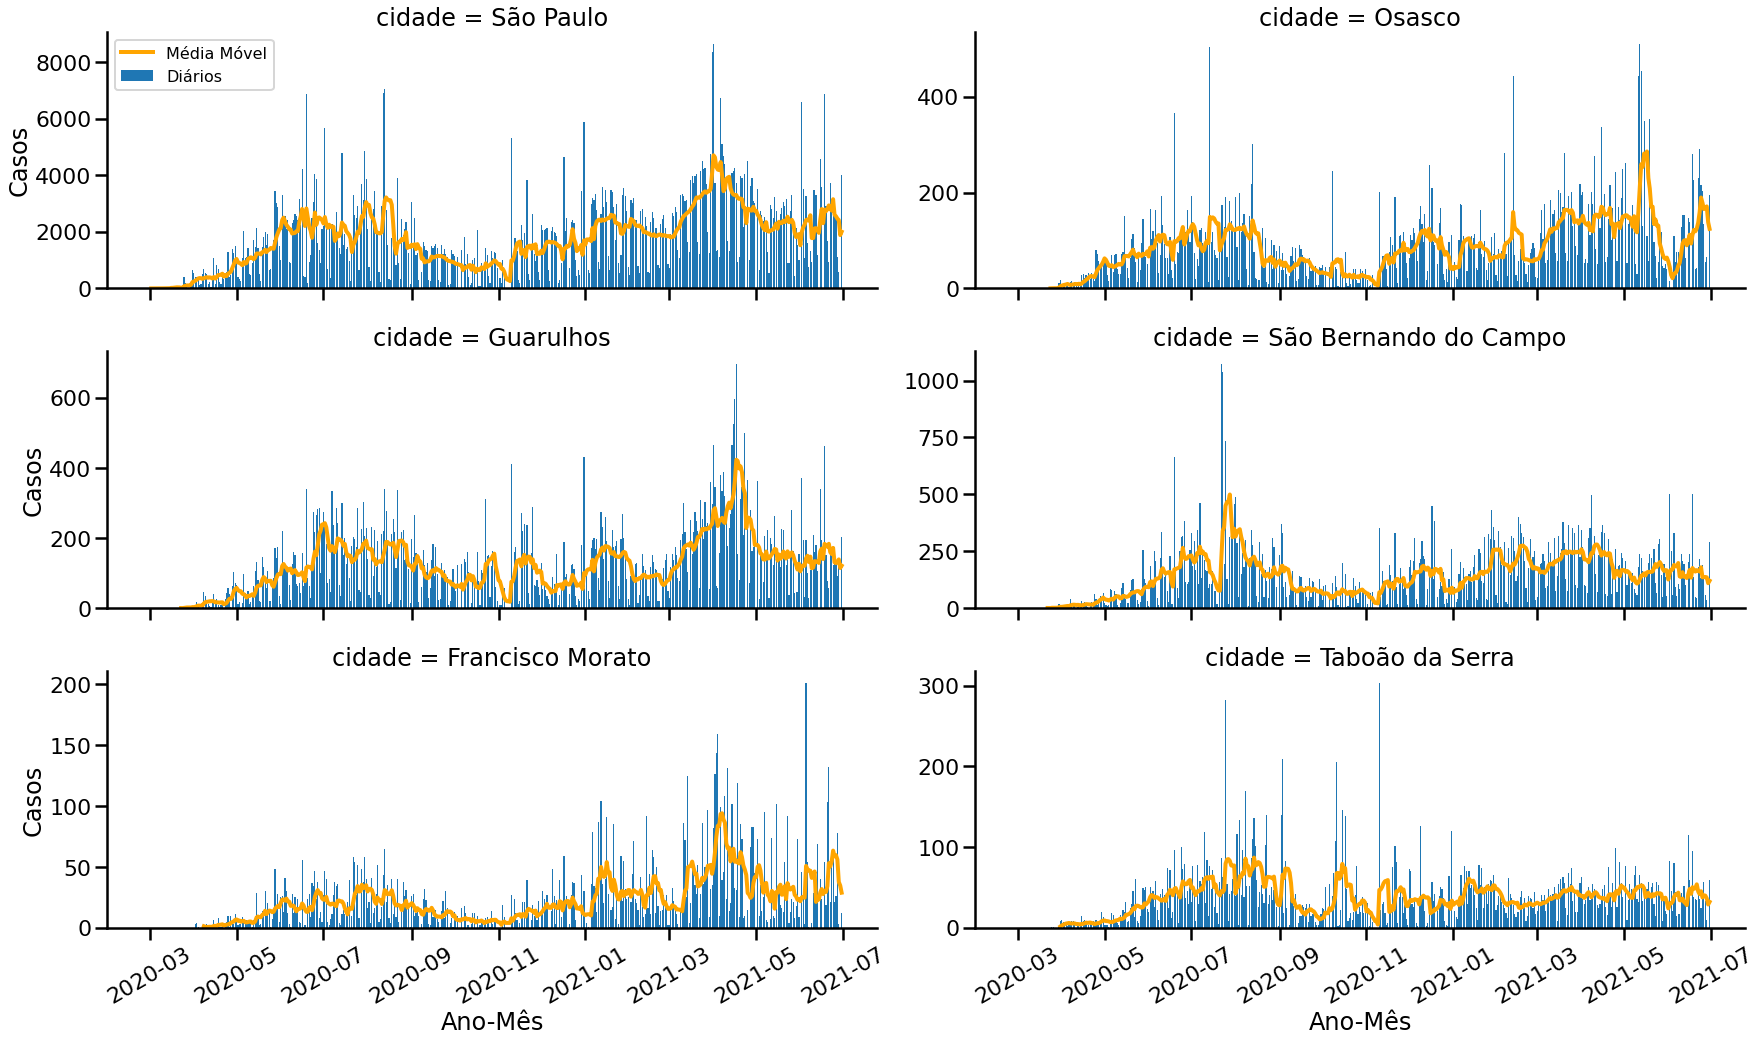

In [7]:
sns.set_context("poster")
g = sns.FacetGrid(data = df_cities, col = "cidade", col_wrap = 2, sharey = False, height = 5, aspect = 2.5)
g.map_dataframe(plt.bar, x = "date", height = "new_confirmed", label = "Diários")
g.map_dataframe(sns.lineplot, x = "date", y = "ma_cases", linewidth = 4, label = "Média Móvel", color = "orange")
g.set_xticklabels(rotation = 30)
g.set_axis_labels("Ano-Mês", "Casos")
g.axes[0].legend(fontsize = 16, loc = "upper left")
plt.tight_layout()
plt.show()

dinamica muito parecida em osa e gru e fm, curiosamente fm fica longe, mas sbc e taboao tiveram dinamicas relativamente diferentes

## Mortes

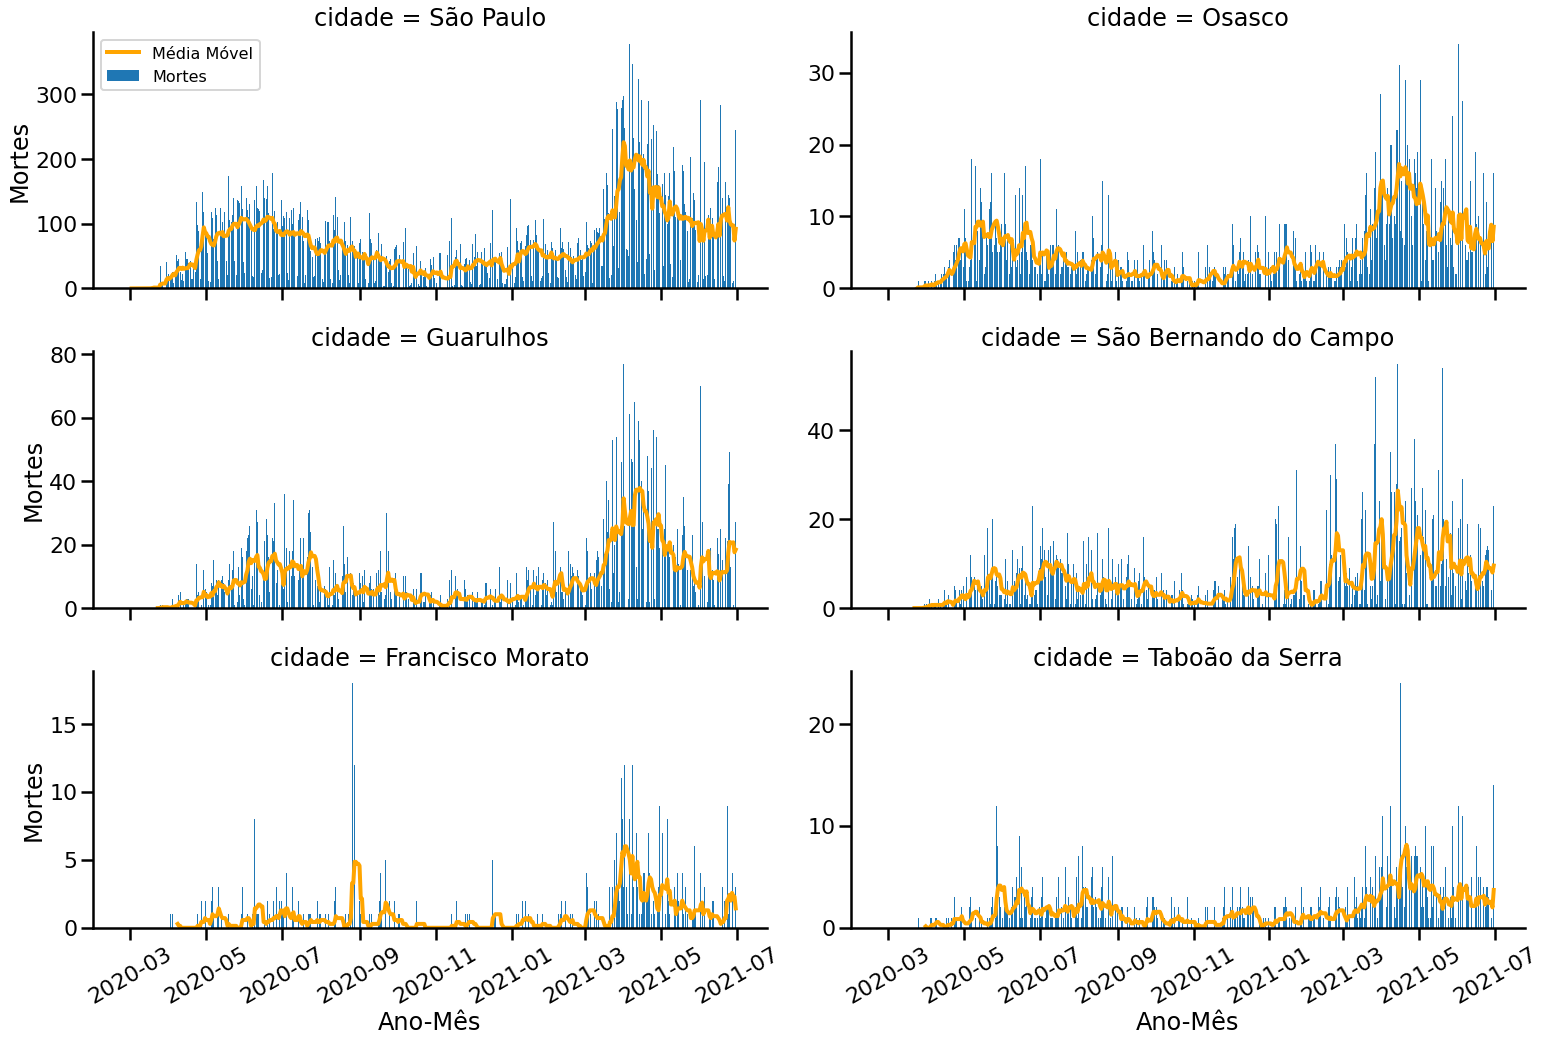

In [8]:
sns.set_context("poster")
g = sns.FacetGrid(data = df_cities, col = "cidade", col_wrap = 2, sharey = False, height = 5, aspect = 2.2)
g.map_dataframe(plt.bar, x = "date", height = "new_deaths", label = "Mortes")
g.map_dataframe(sns.lineplot, x = "date", y = "ma_deaths", linewidth = 4, label = "Média Móvel", color = "orange")
g.set_axis_labels("Ano-Mês", "Mortes")
g.set_xticklabels(rotation = 30)
g.axes[0].legend(fontsize = 16, loc = "upper left")
plt.tight_layout()
plt.show()

dinamica de mortes foi bem mais parecida, guardadas as devidas proporções, todos tiveram aumento no começo de 2021

In [9]:
sns.set_context("talk")

## Analise de correlação

### Casos

In [10]:
sp_osa = smt.ccf(df_sp.loc[:,"new_confirmed"], df_osa.loc[:,"new_confirmed"], unbiased = False)
sp_osa_lag = range(0, len(df_osa))

sp_gru = smt.ccf(df_sp.loc[:,"new_confirmed"], df_gru.loc[:,"new_confirmed"], unbiased = False)
sp_gru_lag = range(0, len(df_gru))

sp_sbc = smt.ccf(df_sp.loc[:,"new_confirmed"], df_sbc.loc[:,"new_confirmed"], unbiased = False)
sp_sbc_lag = range(0, len(df_sbc))

sp_fm = smt.ccf(df_sp.loc[:,"new_confirmed"], df_fm.loc[:,"new_confirmed"], unbiased = False)
sp_fm_lag = range(0, len(df_fm))

sp_tab = smt.ccf(df_sp.loc[:,"new_confirmed"], df_tab.loc[:,"new_confirmed"], unbiased = False)
sp_tab_lag = range(0, len(df_tab))

In [11]:
corrs = [sp_osa, sp_gru, sp_sbc, sp_fm, sp_tab]
corr_lags = [sp_osa_lag, sp_gru_lag, sp_sbc_lag, sp_fm_lag, sp_tab_lag]
cidades = ["Osasco", "Guarulhos", "São Bernardo do Campo", "Francisco Morato", "Taboão da Serra"]

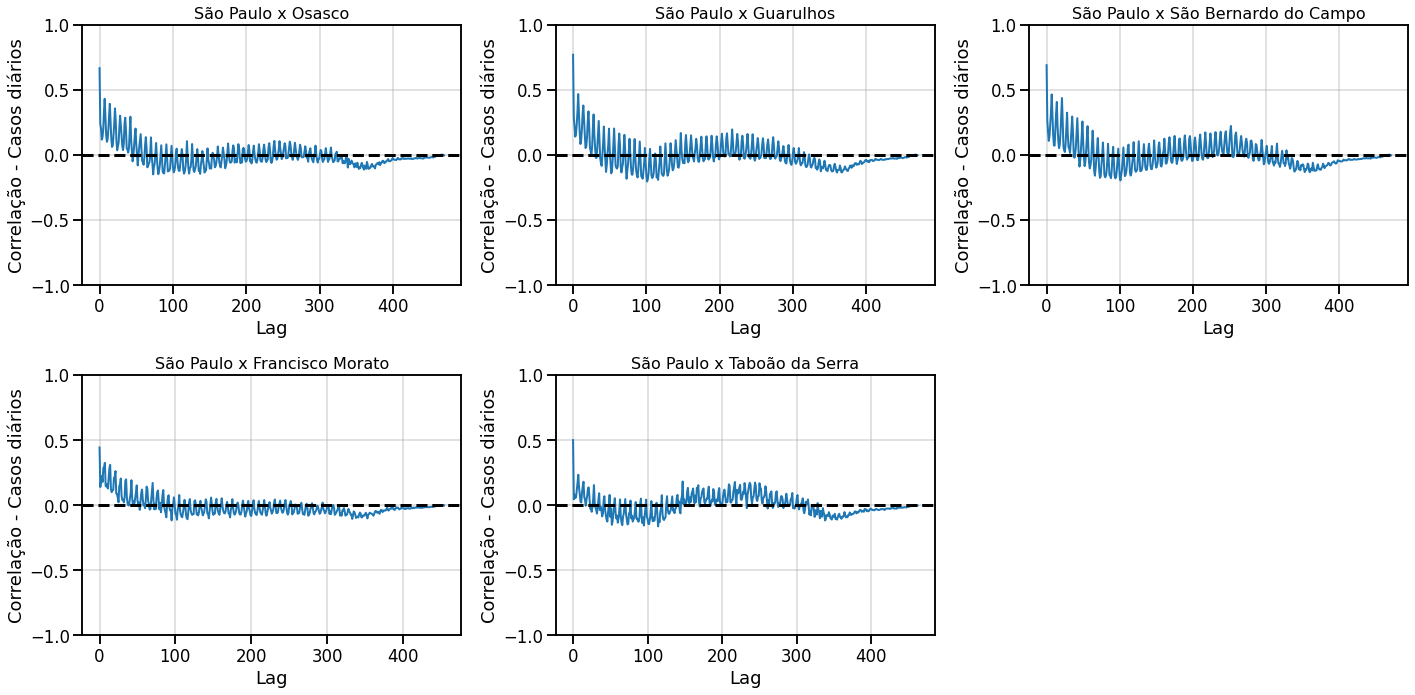

In [12]:
fig = plt.figure(figsize = (20, 10))

for k in range(1,6):
  fig.add_subplot(2, 3, k)
  plt.title("São Paulo x " + cidades[k -1], fontsize = 16)
  plt.plot(corr_lags[k - 1], corrs[k - 1], lw = 2)
  plt.ylim(-1,1)
  plt.xlabel("Lag")
  plt.ylabel("Correlação - Casos diários")
  plt.grid(alpha = .5)
  plt.axhline(y = 0, color = "black", lw = 3, ls = "--")
 
plt.tight_layout()
plt.show()

cross corr maior nas 3 cidades grandes, principalmente no começo

### Mortes

In [13]:
sp_osa = smt.ccf(df_sp.loc[:,"new_deaths"], df_osa.loc[:,"new_deaths"], unbiased = False)
sp_osa_lag = range(0, len(df_osa))

sp_gru = smt.ccf(df_sp.loc[:,"new_deaths"], df_gru.loc[:,"new_deaths"], unbiased = False)
sp_gru_lag = range(0, len(df_gru))

sp_sbc = smt.ccf(df_sp.loc[:,"new_deaths"], df_sbc.loc[:,"new_deaths"], unbiased = False)
sp_sbc_lag = range(0, len(df_sbc))

sp_fm = smt.ccf(df_sp.loc[:,"new_deaths"], df_fm.loc[:,"new_deaths"], unbiased = False)
sp_fm_lag = range(0, len(df_fm))

sp_tab = smt.ccf(df_sp.loc[:,"new_deaths"], df_tab.loc[:,"new_deaths"], unbiased = False)
sp_tab_lag = range(0, len(df_tab))

In [14]:
corrs = [sp_osa, sp_gru, sp_sbc, sp_fm, sp_tab]
corr_lags = [sp_osa_lag, sp_gru_lag, sp_sbc_lag, sp_fm_lag, sp_tab_lag]
cidades = ["Osasco", "Guarulhos", "São Bernardo do Campo", "Francisco Morato", "Taboão da Serra"]

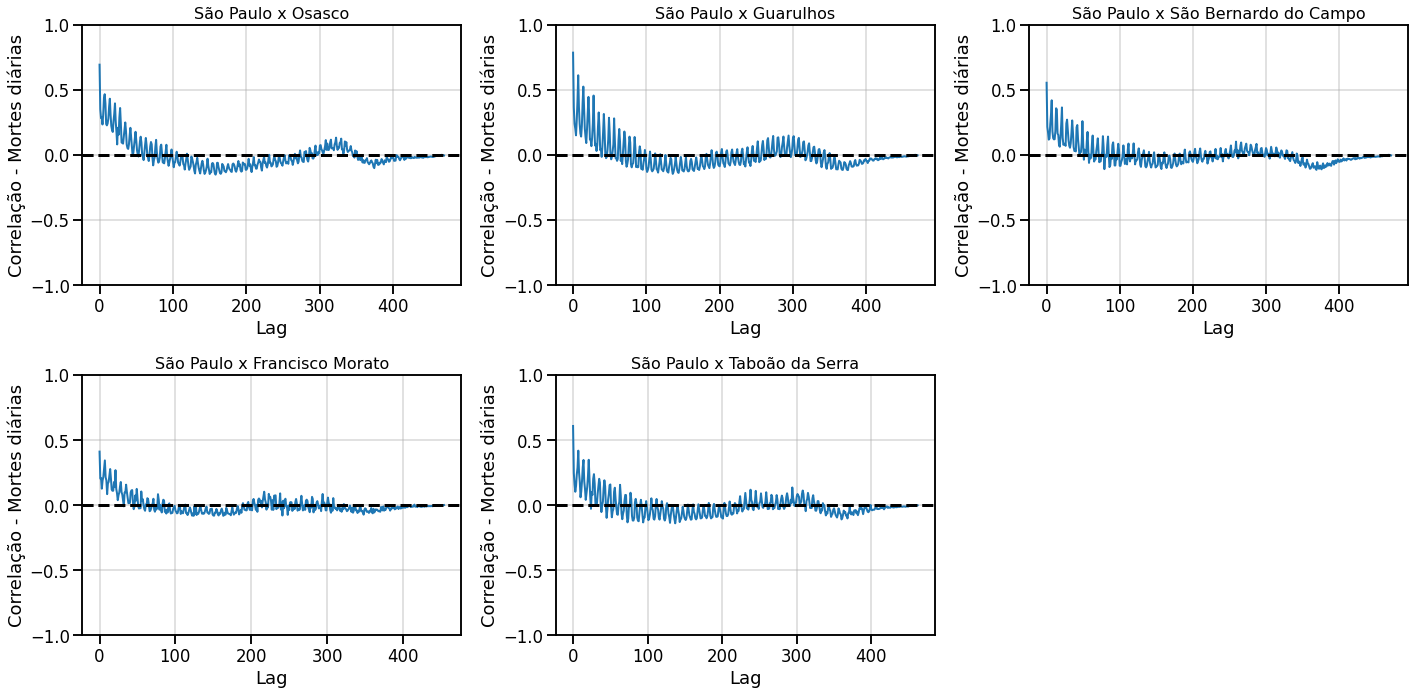

In [15]:
fig = plt.figure(figsize = (20, 10))

for k in range(1,6):
  fig.add_subplot(2, 3, k)
  plt.title("São Paulo x " + cidades[k -1], fontsize = 16)
  plt.plot(corr_lags[k - 1], corrs[k - 1], lw = 2)
  plt.ylim(-1,1)
  plt.xlabel("Lag")
  plt.ylabel("Correlação - Mortes diárias")
  plt.grid(alpha = .5)
  plt.axhline(y = 0, color = "black", lw = 3, ls = "--")

plt.tight_layout()
plt.show()

como esperado, a dinamica das mortes apresenta maiores valores e padrões mais próximos

# Vacinação

# Estado

É importante notar que os dados a nivel de estado tem a distinção entre segunda e primeira doses.

In [16]:
vac_estado.head()

,date,Dose,Contagem de Dose
0,2021-06-30,1° DOSE,227818
1,2021-06-29,1° DOSE,382714
2,2021-06-28,1° DOSE,288149
3,2021-06-27,1° DOSE,35104
4,2021-06-26,1° DOSE,301371


In [17]:
vac_estado_means = vac_estado.copy()
vac_estado_means.loc[(vac_estado_means["Dose"] == "1° DOSE"), "ma"] = vac_estado_means.loc[vac_estado_means.Dose.shift() == "1° DOSE", "Contagem de Dose"].rolling(window = 7, center = False).mean()
vac_estado_means.loc[(vac_estado_means["Dose"] == "2° DOSE"), "ma"] = vac_estado_means.loc[vac_estado_means.Dose.shift() == "2° DOSE", "Contagem de Dose"].rolling(window = 7, center = False).mean()

In [18]:
vac_estado_means = vac_estado_means[:-4]

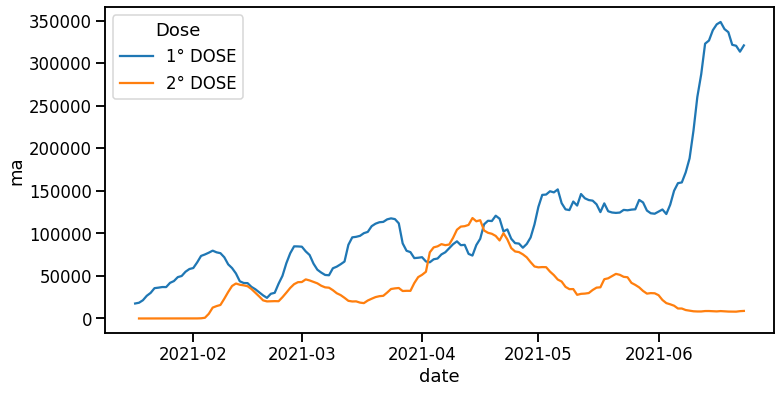

In [19]:
plt.figure(figsize=(12,6))

sns.lineplot(data = vac_estado_means, x = "date", y = "ma", hue = "Dose")

podemos ver que existe um lag de primeira e segunda dose, em junho teve um grande aporte de doses da pfizer e janssen, que se espalharam da capital para as outras cidades

porem, para facilitar a analise, vamos considerar as taxas do total de doses aplicadas diariamente, pois os dados municipais só tem nesse nivel. limitações: sabemos que esses dados vão diminuir, temos que considerar o efetivo sempre como o dobro, então na prática é como se tivessemos trabalhando com o dobro da população

In [20]:
duas_doses = vac_estado.groupby("date").sum().reset_index()
duas_doses_means = duas_doses.copy()
duas_doses_means.loc[:,"ma"] = duas_doses_means.loc[:,"Contagem de Dose"].rolling(window = 7, center = False).mean()

In [21]:
duas_doses.loc[:,"cumulativo"] = duas_doses.loc[:,"Contagem de Dose"].cumsum()

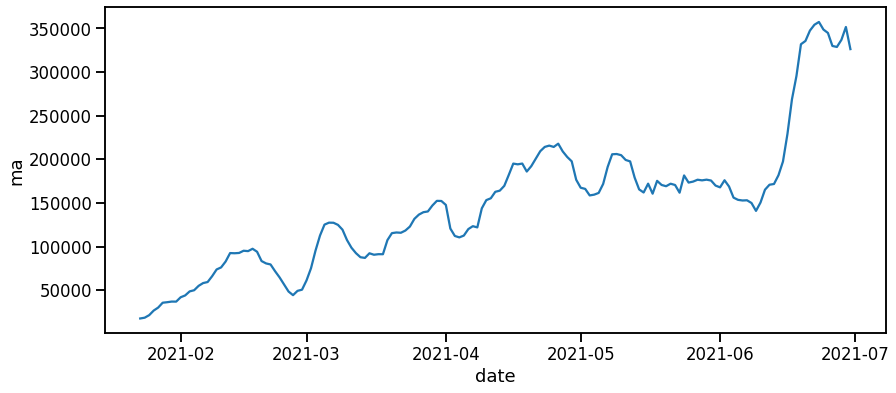

In [22]:
plt.figure(figsize = (14,6))
sns.lineplot(data = duas_doses_means, x = "date", y = "ma")

# Cidades

In [23]:
vac_sp.loc[:,"ma"] = vac_sp.loc[:,"Doses Aplicadas"].rolling(window = 7, center = False).mean()
vac_sp.loc[:,"cumulativo"] = vac_sp.loc[:,"Doses Aplicadas"].cumsum()

vac_osa.loc[:,"ma"] = vac_osa.loc[:,"Doses Aplicadas"].rolling(window = 7, center = False).mean()
vac_osa.loc[:,"cumulativo"] = vac_osa.loc[:,"Doses Aplicadas"].cumsum()

vac_gru.loc[:,"ma"] = vac_gru.loc[:,"Doses Aplicadas"].rolling(window = 7, center = False).mean()
vac_gru.loc[:,"cumulativo"] = vac_gru.loc[:,"Doses Aplicadas"].cumsum()

vac_sbc.loc[:,"ma"] = vac_sbc.loc[:,"Doses Aplicadas"].rolling(window = 7, center = False).mean()
vac_sbc.loc[:,"cumulativo"] = vac_sbc.loc[:,"Doses Aplicadas"].cumsum()

vac_fm.loc[:,"ma"] = vac_fm.loc[:,"Doses Aplicadas"].rolling(window = 7, center = False).mean()
vac_fm.loc[:,"cumulativo"] = vac_fm.loc[:,"Doses Aplicadas"].cumsum()

vac_tab.loc[:,"ma"] = vac_tab.loc[:,"Doses Aplicadas"].rolling(window = 7, center = False).mean()
vac_tab.loc[:,"cumulativo"] = vac_tab.loc[:,"Doses Aplicadas"].cumsum()

In [24]:
vac_cities = pd.concat([vac_sp, vac_osa, vac_gru, vac_sbc, vac_fm, vac_tab],
                       axis = 0, join = "inner", keys = ["São Paulo","Osasco","Guarulhos",
                                                    "São Bernando do Campo", "Francisco Morato",
                                                    "Taboão da Serra"]).reset_index()

vac_cities.drop("level_1", axis = 1, inplace = True)
vac_cities.rename(columns = {"level_0": "cidade"}, inplace = True)
vac_cities

,cidade,Data,Doses Aplicadas,ma,cumulativo
0,São Paulo,2021-01-17,162,NaN,162
1,São Paulo,2021-01-18,1040,NaN,1202
2,São Paulo,2021-01-19,7943,NaN,9145
3,São Paulo,2021-01-20,12974,NaN,22119
4,São Paulo,2021-01-21,27627,NaN,49746
...,...,...,...,...,...
951,Taboão da Serra,2021-06-25,4616,2570.857143,122573
952,Taboão da Serra,2021-06-26,3,2059.285714,122576
953,Taboão da Serra,2021-06-28,2822,2461.714286,125398
954,Taboão da Serra,2021-06-29,2189,2475.428571,127587


## Taxas diárias

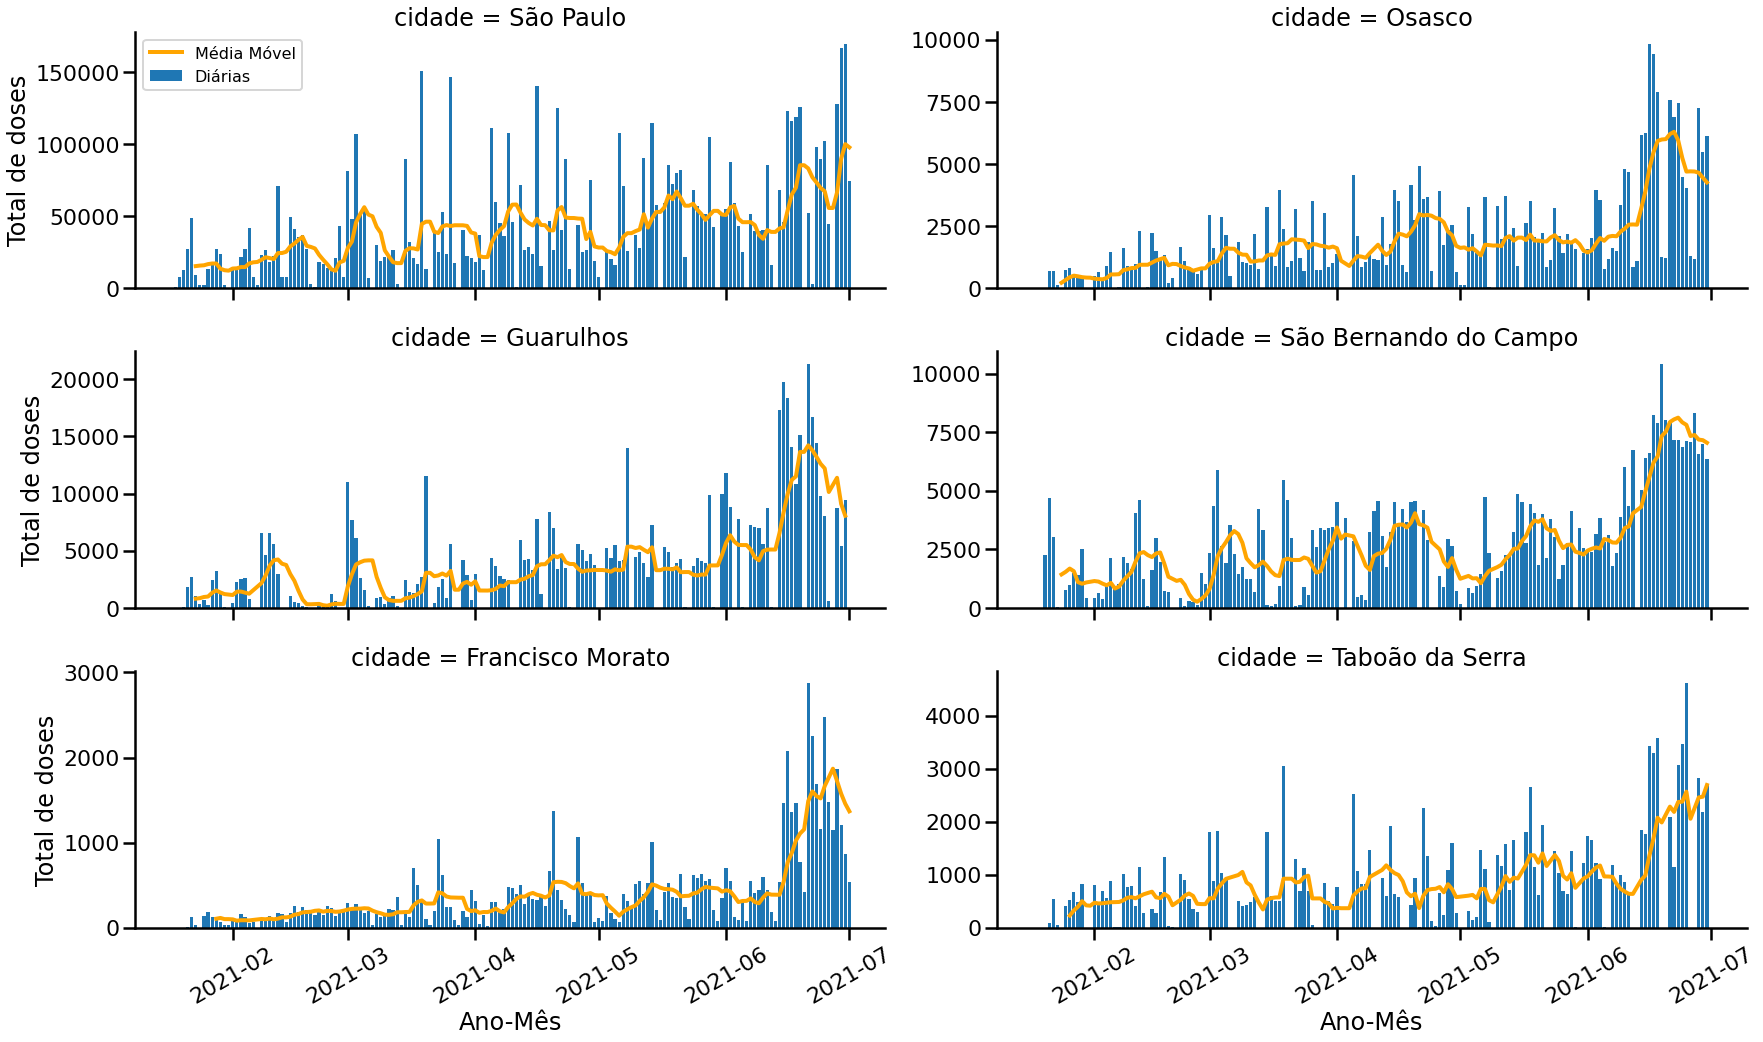

In [25]:
sns.set_context("poster")
g = sns.FacetGrid(data = vac_cities, col = "cidade", col_wrap = 2, sharey = False, height = 5, aspect = 2.5)
g.map_dataframe(plt.bar, x = "Data", height = "Doses Aplicadas", label = "Diárias")
g.map_dataframe(sns.lineplot, x = "Data", y = "ma", linewidth = 4, color = "orange", label = "Média Móvel")
g.set_xticklabels(rotation = 30)
g.set_axis_labels("Ano-Mês", "Total de doses")
g.axes[0].legend(fontsize = 16, loc = "upper left")
plt.tight_layout()
plt.show()

vemos o padrão discutido, em são paulo não teve aumento expressivo nos ultimos dias porque já tinha vacinas da pfizer, o "boom" começou nas outras cidades

### Correlação

In [26]:
sp_osa = smt.ccf(vac_sp.loc[:,"Doses Aplicadas"], vac_osa.loc[:,"Doses Aplicadas"], unbiased = False)
sp_osa_lag = range(0, len(vac_osa))

sp_gru = smt.ccf(vac_sp.loc[:,"Doses Aplicadas"], vac_gru.loc[:,"Doses Aplicadas"], unbiased = False)
sp_gru_lag = range(0, len(vac_gru))

sp_sbc = smt.ccf(vac_sp.loc[:,"Doses Aplicadas"], vac_sbc.loc[:,"Doses Aplicadas"], unbiased = False)
sp_sbc_lag = range(0, len(vac_sbc))

sp_fm = smt.ccf(vac_sp.loc[:,"Doses Aplicadas"], vac_fm.loc[:,"Doses Aplicadas"], unbiased = False)
sp_fm_lag = range(0, len(vac_fm))

sp_tab = smt.ccf(vac_sp.loc[:,"Doses Aplicadas"], vac_tab.loc[:,"Doses Aplicadas"], unbiased = False)
sp_tab_lag = range(0, len(vac_tab))

In [27]:
corrs = [sp_osa, sp_gru, sp_sbc, sp_fm, sp_tab]
corr_lags = [sp_osa_lag, sp_gru_lag, sp_sbc_lag, sp_fm_lag, sp_tab_lag]
cidades = ["Osasco", "Guarulhos", "São Bernardo do Campo", "Francisco Morato", "Taboão da Serra"]

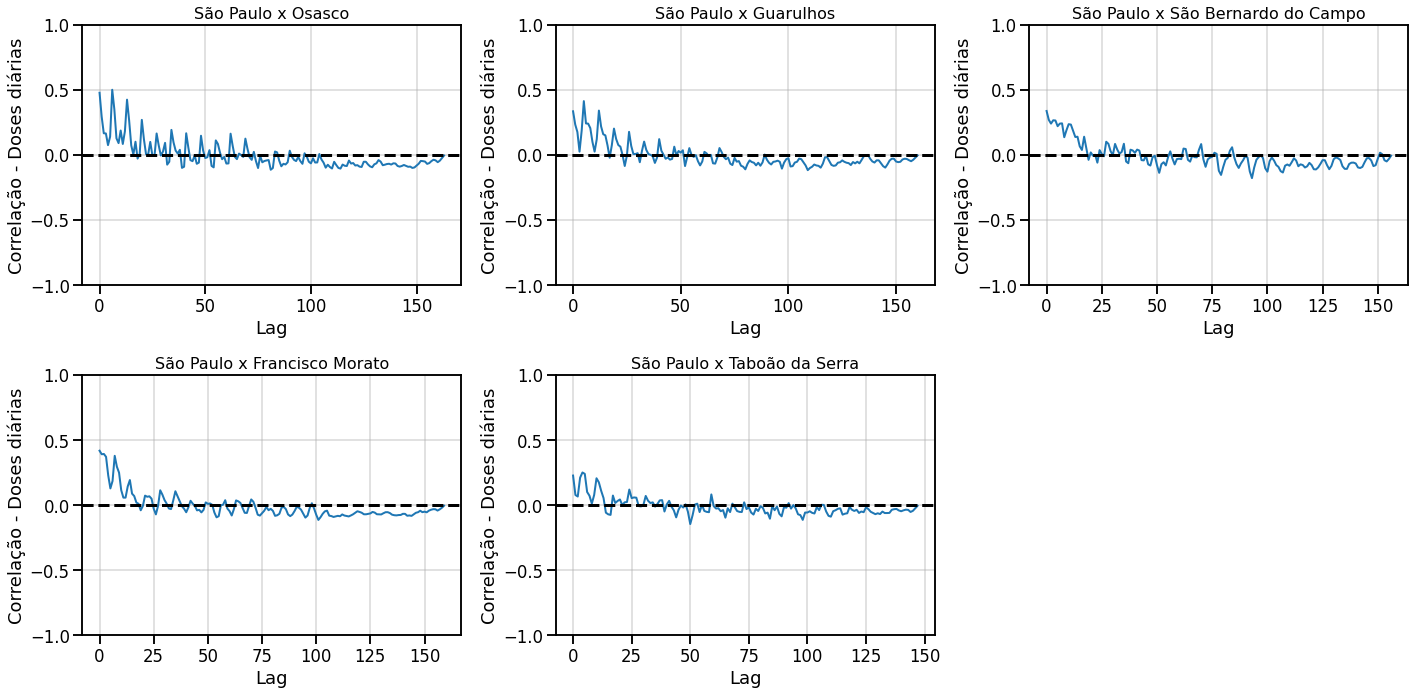

In [28]:
sns.set_context("talk")

fig = plt.figure(figsize = (20, 10))

for k in range(1,6):
  fig.add_subplot(2, 3, k)
  plt.title("São Paulo x " + cidades[k - 1], fontsize = 16)
  plt.plot(corr_lags[k - 1], corrs[k - 1], lw = 2)
  plt.ylim(-1,1)
  plt.xlabel("Lag")
  plt.ylabel("Correlação - Doses diárias")
  plt.grid(alpha = .5)
  plt.axhline(y = 0, color = "black", lw = 3, ls = "--")
 
plt.tight_layout()
plt.show()

nesse ponto, os dados são escassos demais e em escalas muito diferentes para se fazer grandes inferencias, o que não invalida a observação de que existem correlações

In [29]:
sns.reset_defaults()

# Previsões

queremos estimar como essa taxa vai crescer, para saber se o ritmo de vacinação pode aumentar e como aumentar. vamos olhar primeiro para o estado, balizando nossas expectativas: a taxa diária não pode ser muio absurda. uma estimativa é pegar o numero que brasil consegue aplicar, e manter a relação da população, de 20%, ficando em torno desse valor, podemos ver em quanto tempo estaremos em capacidade máxima, se nada mudar

In [30]:
def run_model(df, 
              periods,
              changepoints = None,
              n_changepoints = 25, 
              changepoint_prior_scale = 0.05, 
              changepoint_range = 0.8,
              holidays = None,
              growth = "linear",
              cap = None):
  
  mx = Prophet(changepoints = changepoints, 
               n_changepoints = n_changepoints,
               changepoint_prior_scale = changepoint_prior_scale,
               changepoint_range = changepoint_range,
               holidays = holidays,
               growth = growth) # chama o objeto de modelo

  mx.fit(df) # associa o modelo ao dataframe de treino

  if growth == "logistic" :
    df_prev = mx.make_future_dataframe(periods = periods)
    df_prev.loc[:,"cap"] = cap.repeat(len(df_prev)) # cria o dataframe de previsão que vai ser gerado mas não utilizado fora
    prev = mx.predict(df_prev) # faz a previsao baseada no modelo ajustado e no dataframe de previsao

  else : 
    df_prev = mx.make_future_dataframe(periods = periods) # cria o dataframe de previsão que vai ser gerado mas não utilizado fora
    prev = mx.predict(df_prev) # faz a previsao baseada no modelo ajustado e no dataframe de previsao

  return mx, prev # retorna o modelo como elemento [0], e a previsao como elemento [1]

### Para a função rodar na forma mais básica, precisamos apenas passar o dataframe de treino, já formatado como o prophet
### usa, e o periods que vamos estimar os dados.

### Como há uma série de parâmetros da função Prophet, você pode adicioná-los na definição da função.
### Para a aula, vamos brincar com os parâmetros de changepoints, os quais eu deixei com o default da função.

## Taxas diarias

In [31]:
# sem teste
dsy_estado = pd.DataFrame()

dsy_estado.loc[:,"ds"] = duas_doses.loc[:,"date"]
dsy_estado.loc[:,"y"] = duas_doses.loc[:,"Contagem de Dose"]

dsy_estado_teste = pd.DataFrame()

dsy_estado_teste.loc[:,"ds"] = duas_doses.loc[:,"date"]
dsy_estado_teste.loc[:,"y"] = duas_doses.loc[:,"Contagem de Dose"]


Definido um modelo que identifica a meta de 600000~800000 diários, vamos ver o efeito da data:

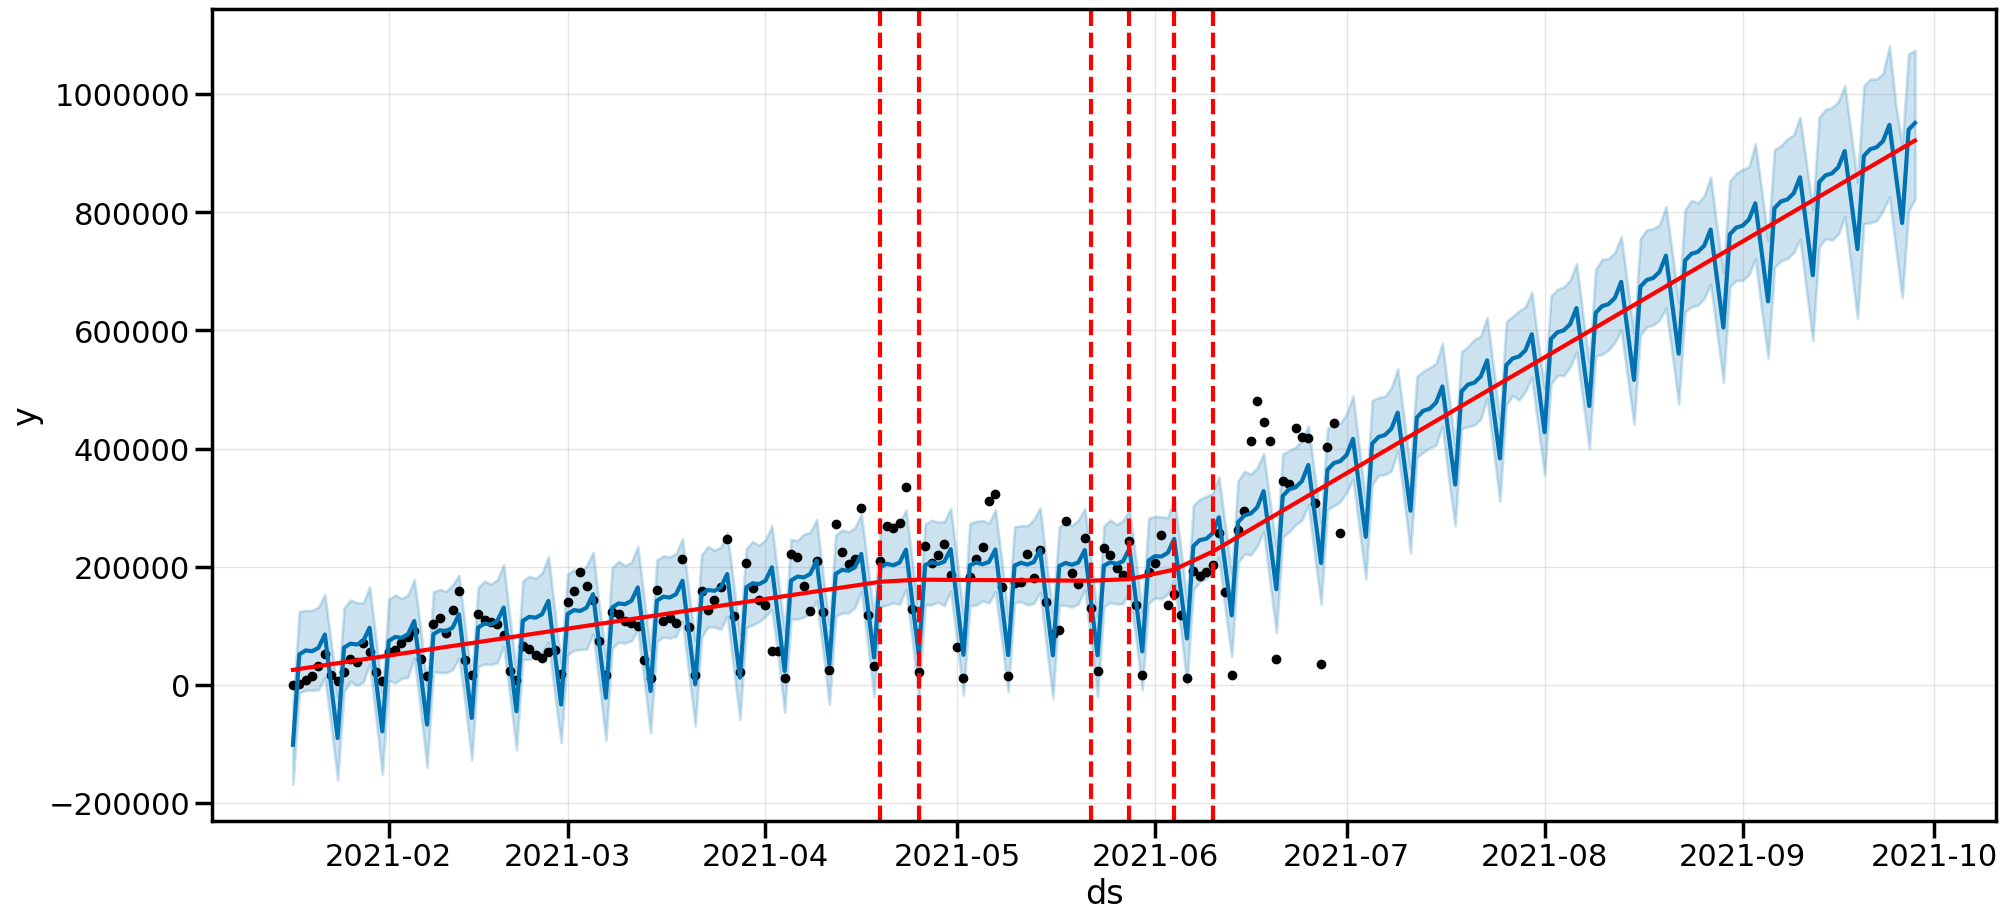

In [32]:
sns.set_context("poster")
m2 = run_model(df = dsy_estado, periods = 90, changepoint_prior_scale = 0.3,
               changepoint_range = 1)

fig = m2[0].plot(m2[1], figsize = (20,10));
# plt.plot(df_estado_teste.loc[:,"ds"], df_estado_teste.loc[:,"y"],"r.")
plt.ticklabel_format(style='plain', axis='y')
add_changepoints_to_plot(fig.gca(), m2[0], m2[1])
plt.show()

validação simples do modelo, porque tem que usar bastante para detectar a mudança de tendencia

In [33]:
df_cv = cross_validation(m2[0], initial = "80 days", period = "7 days", horizon = "7 days")
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-04-08,161575.478438,116234.180090,201877.714215,125005,2021-04-07
1,2021-04-09,171990.619390,128388.155887,215436.625124,209674,2021-04-07
2,2021-04-10,111997.696962,68206.772316,156266.113771,123529,2021-04-07
3,2021-04-11,75685.886602,28490.352242,117218.426570,25880,2021-04-07
4,2021-04-12,178202.305457,134242.380840,221960.759561,272738,2021-04-07
...,...,...,...,...,...,...
79,2021-06-26,326929.873739,264080.071311,393240.445162,307998,2021-06-23
80,2021-06-27,254497.615634,196578.290857,316960.089822,35674,2021-06-23
81,2021-06-28,405496.757420,339144.285468,469836.980873,402763,2021-06-23
82,2021-06-29,417947.194600,353877.222319,482045.429707,444026,2021-06-23


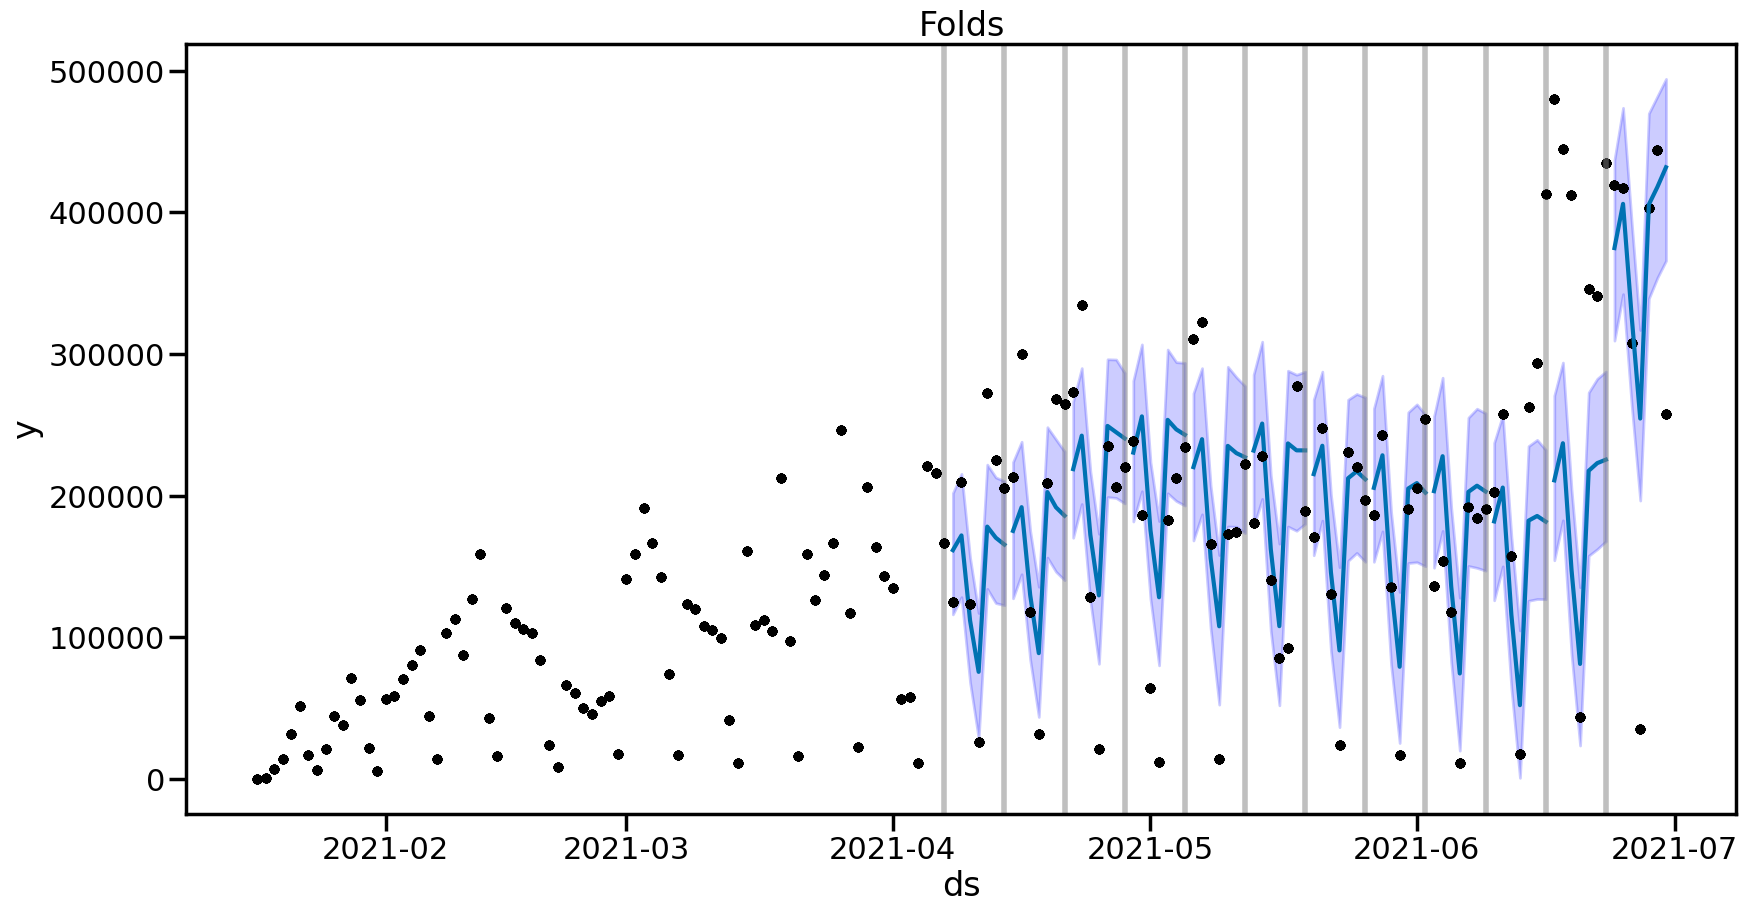

In [34]:
sns.set_context("poster")
lista_cutoff = df_cv['cutoff'].unique()

plt.figure(figsize = (20,10))
for cutoff in lista_cutoff:

    df_cv_cut = df_cv[df_cv['cutoff'].values == cutoff]
    ax = plt.plot(m2[0].history['ds'].values, m2[0].history['y'], 'k.')

    plt.plot(df_cv_cut['ds'].values, df_cv_cut['yhat'], ls='-', c='#0072B2', label='previsão')

    plt.fill_between(df_cv_cut['ds'].values, df_cv_cut['yhat_lower'],
                    df_cv_cut['yhat_upper'], color='blue',
                    alpha=0.2, label='intervalo de confiança')
    
    plt.axvline(x=pd.to_datetime(cutoff), c='gray', lw=4, alpha=0.5, label='cutoff')
    
plt.title(f'Folds')
plt.ylabel('y')
plt.xlabel('ds')
fig.tight_layout()
plt.show()

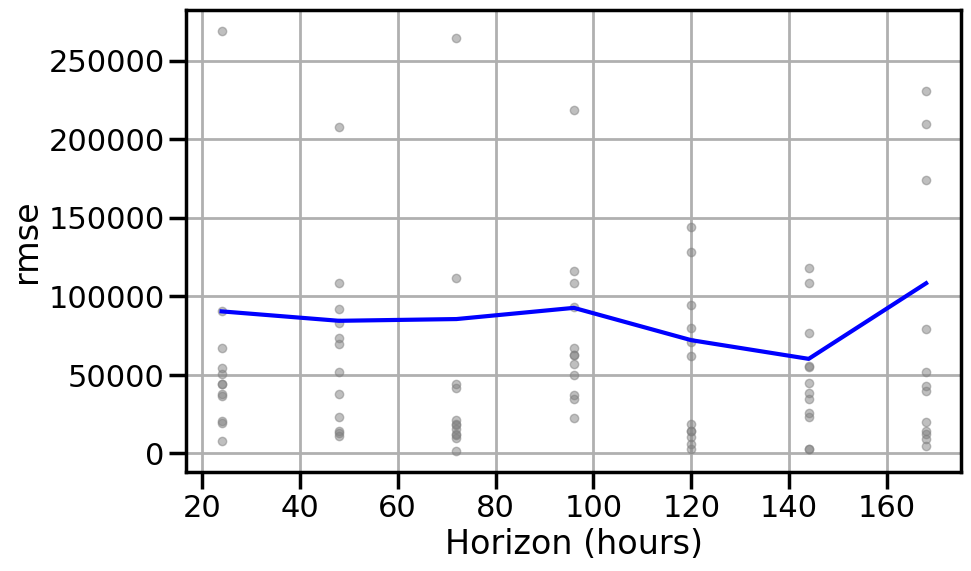

In [35]:
plot_cross_validation_metric(df_cv, metric = "rmse");

# Cidades

vamos expandir esse raciocinio para as cidades

In [36]:
vac_sp.columns

Index(['Data', 'Doses Aplicadas', 'ma', 'cumulativo'], dtype='object')

In [37]:
dsy_sp = pd.DataFrame()
dsy_sp.loc[:,"ds"] = vac_sp.loc[:,"Data"]
dsy_sp.loc[:,"y"] = vac_sp.loc[:,"Doses Aplicadas"]

dsy_osa = pd.DataFrame()
dsy_osa.loc[:,"ds"] = vac_osa.loc[:,"Data"]
dsy_osa.loc[:,"y"] = vac_osa.loc[:,"Doses Aplicadas"]

dsy_gru = pd.DataFrame()
dsy_gru.loc[:,"ds"] = vac_gru.loc[:,"Data"]
dsy_gru.loc[:,"y"] = vac_gru.loc[:,"Doses Aplicadas"]

dsy_sbc = pd.DataFrame()
dsy_sbc.loc[:,"ds"] = vac_sbc.loc[:,"Data"]
dsy_sbc.loc[:,"y"] = vac_sbc.loc[:,"Doses Aplicadas"]

dsy_fm = pd.DataFrame()
dsy_fm.loc[:,"ds"] = vac_fm.loc[:,"Data"]
dsy_fm.loc[:,"y"] = vac_fm.loc[:,"Doses Aplicadas"]

dsy_tab = pd.DataFrame()
dsy_tab.loc[:,"ds"] = vac_tab.loc[:,"Data"]
dsy_tab.loc[:,"y"] = vac_tab.loc[:,"Doses Aplicadas"]


In [38]:
m1_sp = run_model(df = dsy_sp, periods = 90, changepoint_prior_scale = 2, changepoint_range = 1)
m1_osa = run_model(df = dsy_osa, periods = 90, changepoint_prior_scale = 0.3, changepoint_range = 1)
m1_gru = run_model(df = dsy_gru, periods = 90, changepoint_prior_scale = 0.3, changepoint_range = 1)
m1_sbc = run_model(df = dsy_sbc, periods = 90, changepoint_prior_scale = 0.3, changepoint_range = 1)
m1_fm = run_model(df = dsy_fm, periods = 90, changepoint_prior_scale = 0.3, changepoint_range = 1)
m1_tab = run_model(df = dsy_tab, periods = 90, changepoint_prior_scale = 0.3, changepoint_range = 1)

In [39]:
m1_tot = [m1_sp, m1_osa, m1_gru, m1_sbc, m1_fm, m1_tab]
cidades_modelos = ["São Paulo"] + cidades
cidades_modelos

['São Paulo',
 'Osasco',
 'Guarulhos',
 'São Bernardo do Campo',
 'Francisco Morato',
 'Taboão da Serra']

<Figure size 2000x1000 with 0 Axes>

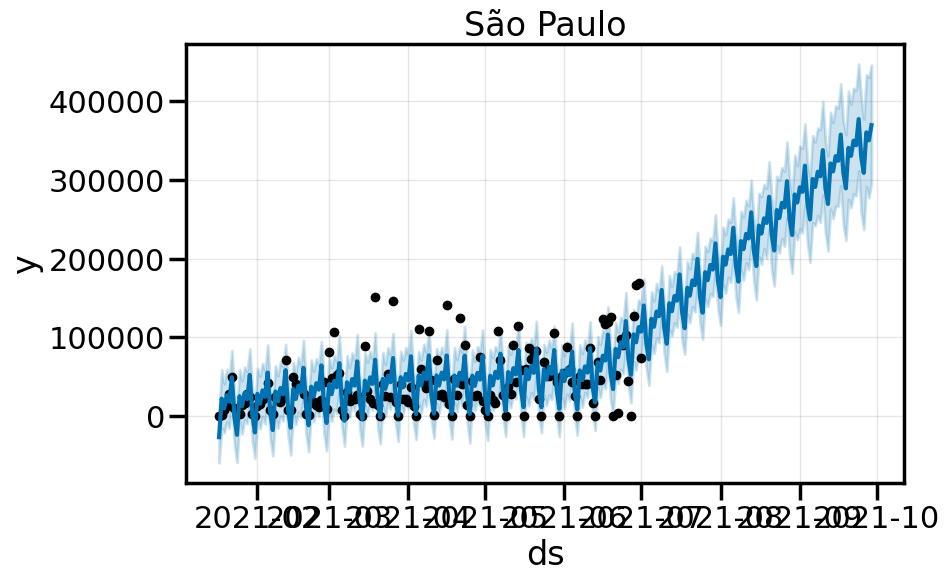

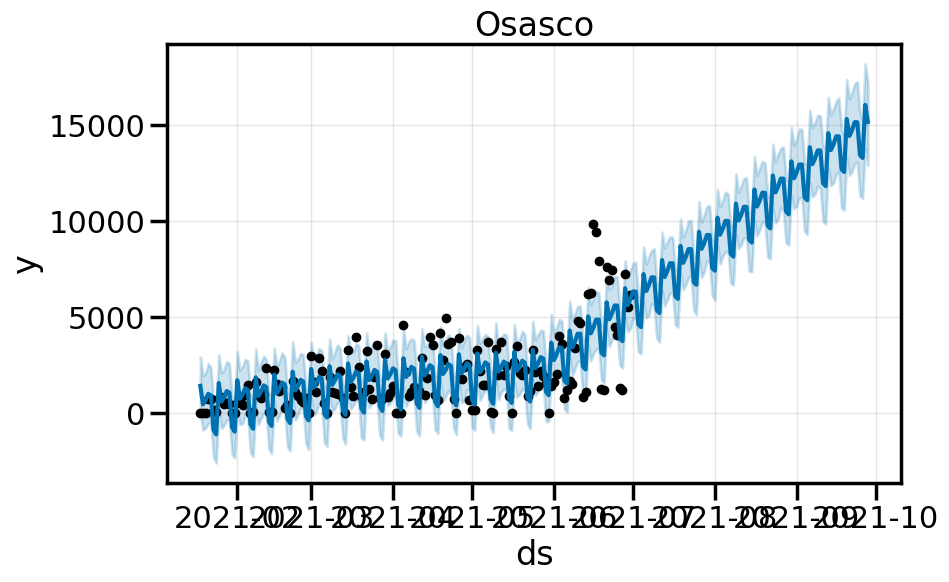

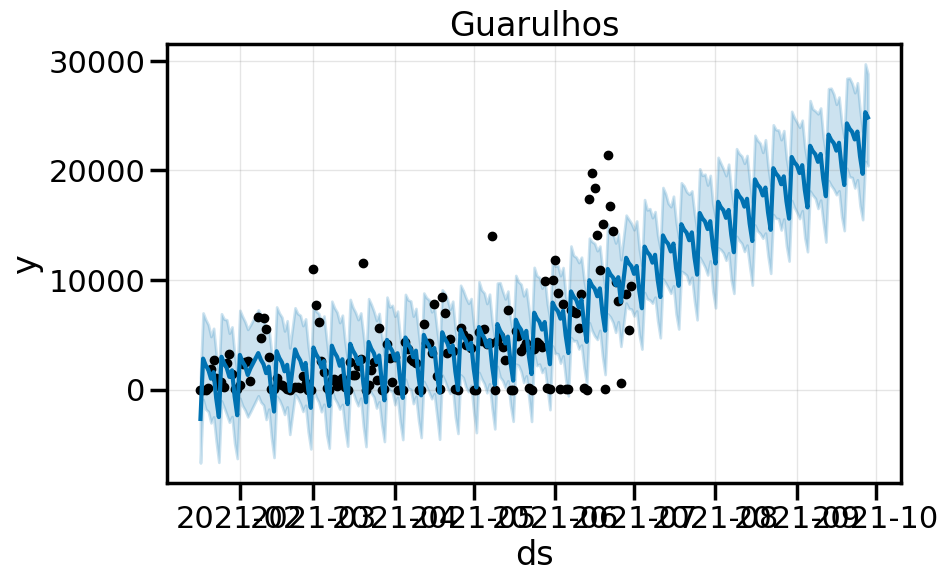

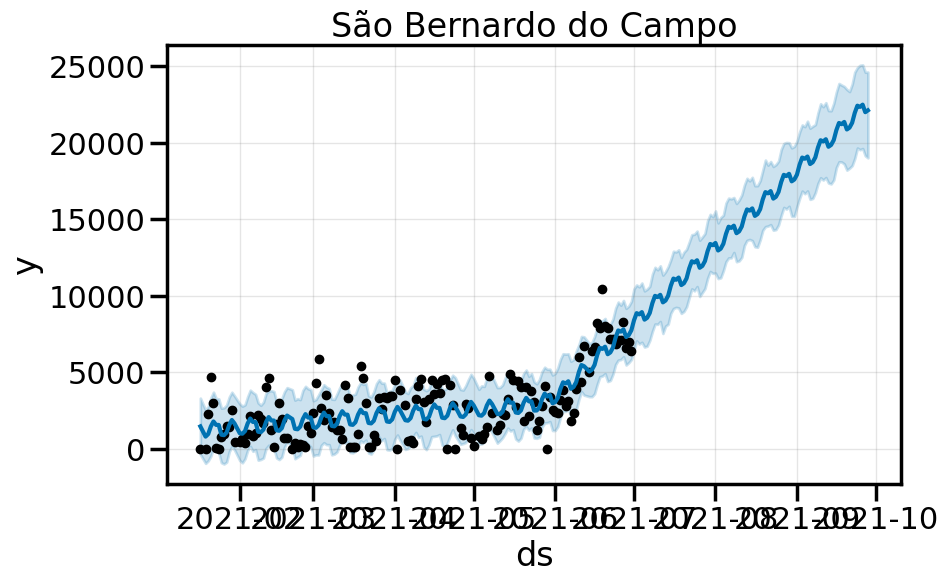

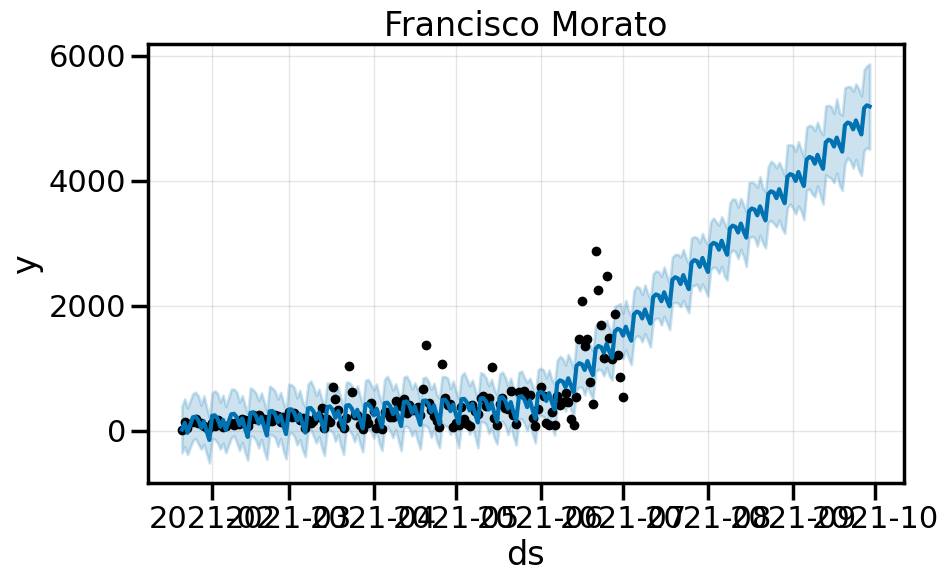

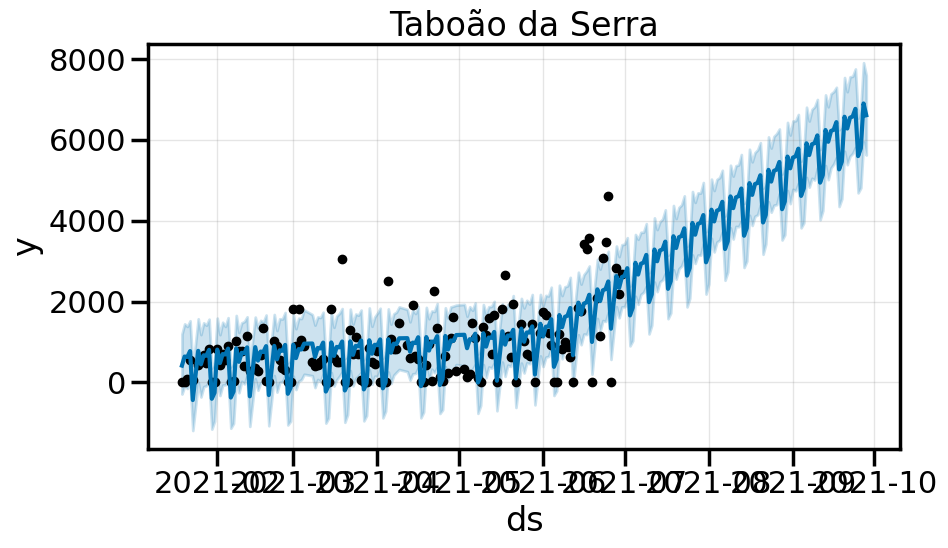

In [40]:
fig = plt.figure(figsize = (20,10))

for k in range(0,6):
  m1_tot[k][0].plot(m1_tot[k][1]);
  plt.title(cidades_modelos[k])
  plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

## Cumulativo

Mas o que importa é entendermos como o cumulativo cresce, para estimar quando conseguiremos terminar a vacinação, ou de população alvo

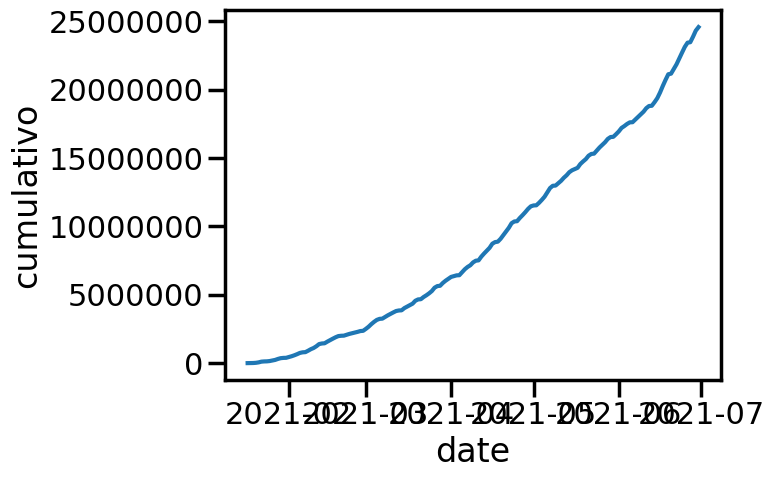

In [41]:
sns.lineplot(data = duas_doses, x = "date", y = "cumulativo")
plt.ticklabel_format(style='plain', axis='y')

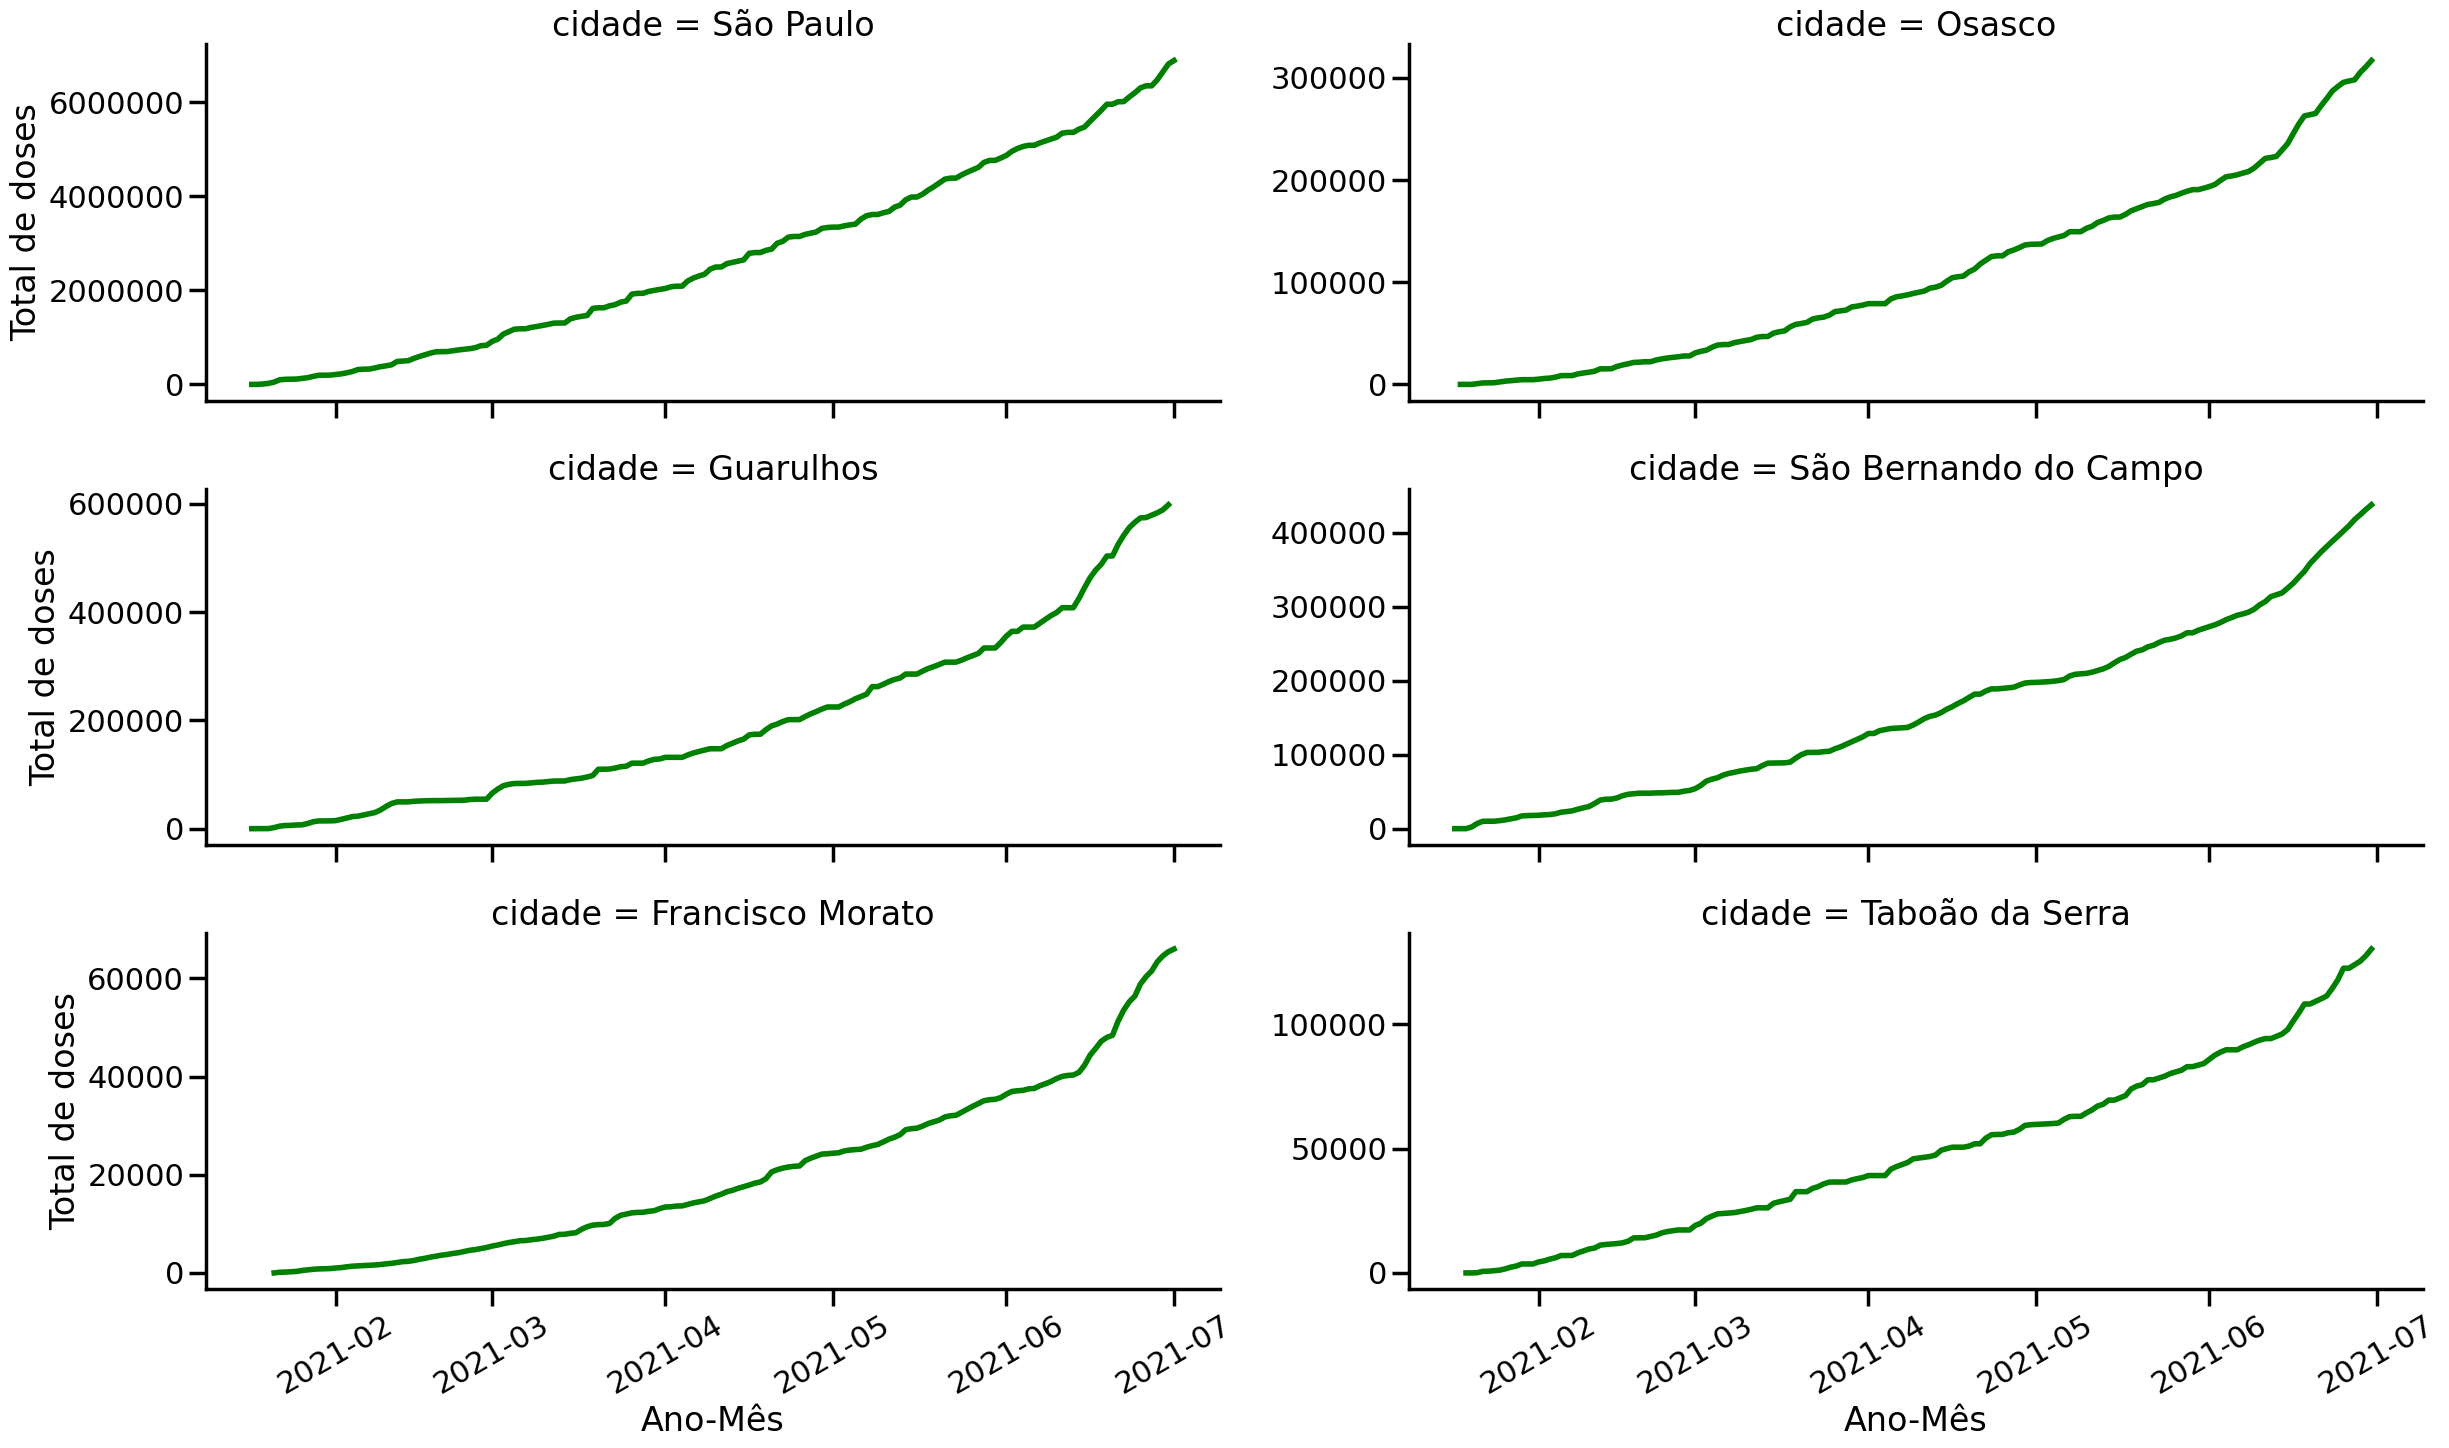

In [42]:
sns.set_context("poster")
g = sns.FacetGrid(data = vac_cities, col = "cidade", col_wrap = 2, sharey = False, height = 5, aspect = 2.5)
g.map_dataframe(sns.lineplot, x = "Data", y = "cumulativo", linewidth = 4, color = "green")
g.set_xticklabels(rotation = 30)
g.set_axis_labels("Ano-Mês", "Total de doses")
g.axes.flat[0].ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

não tem muito segredo nem porque estimar correlação, sabemos que só vai subir, e até vemos a inflexão ali. vamos modelar como um modelo logistico, afinal, um dia todo mundo vai ser vacinado e não pode cair abaixo de 0.

o truque é pegar a população, considerar o dobro para saber o total necessario, e estimar 70% desse valor como o minimo. lembrar também que ainda não estamos vacinando menores de 18 anos, mas essa aproximação é relativamente realista

## Cumulativo

In [43]:
pop_sp = casos_full.query("city == 'São Paulo'").loc[:,"estimated_population"].unique()
pop_osa = casos_full.query("city == 'Osasco'").loc[:,"estimated_population"].unique()
pop_gru = casos_full.query("city == 'Guarulhos'").loc[:,"estimated_population"].unique()
pop_sbc = casos_full.query("city == 'São Bernardo do Campo'").loc[:,"estimated_population"].unique()
pop_fm = casos_full.query("city == 'Francisco Morato'").loc[:,"estimated_population"].unique()
pop_tab = casos_full.query("city == 'Taboão da Serra'").loc[:,"estimated_population"].unique()

In [44]:
dsy_sp = pd.DataFrame()
dsy_sp.loc[:,"ds"] = vac_sp.loc[:,"Data"]
dsy_sp.loc[:,"y"] = vac_sp.loc[:,"cumulativo"]
dsy_sp.loc[:,"cap"] = 2*pop_sp.repeat(len(dsy_sp))

dsy_osa = pd.DataFrame()
dsy_osa.loc[:,"ds"] = vac_osa.loc[:,"Data"]
dsy_osa.loc[:,"y"] = vac_osa.loc[:,"cumulativo"]
dsy_osa.loc[:,"cap"] = 2*pop_osa.repeat(len(dsy_osa))

dsy_gru = pd.DataFrame()
dsy_gru.loc[:,"ds"] = vac_gru.loc[:,"Data"]
dsy_gru.loc[:,"y"] = vac_gru.loc[:,"cumulativo"]
dsy_gru.loc[:,"cap"] = 2*pop_gru.repeat(len(dsy_gru))

dsy_sbc = pd.DataFrame()
dsy_sbc.loc[:,"ds"] = vac_sbc.loc[:,"Data"]
dsy_sbc.loc[:,"y"] = vac_sbc.loc[:,"cumulativo"]
dsy_sbc.loc[:,"cap"] = 2*pop_sbc.repeat(len(dsy_sbc))

dsy_fm = pd.DataFrame()
dsy_fm.loc[:,"ds"] = vac_fm.loc[:,"Data"]
dsy_fm.loc[:,"y"] = vac_fm.loc[:,"cumulativo"]
dsy_fm.loc[:,"cap"] = 2*pop_fm.repeat(len(dsy_fm))

dsy_tab = pd.DataFrame()
dsy_tab.loc[:,"ds"] = vac_tab.loc[:,"Data"]
dsy_tab.loc[:,"y"] = vac_tab.loc[:,"cumulativo"]
dsy_tab.loc[:,"cap"] = 2*pop_tab.repeat(len(dsy_tab))

In [45]:
m2_sp = run_model(df = dsy_sp, periods = 150, growth = "logistic", cap = 2*pop_sp)
m2_osa = run_model(df = dsy_osa, periods = 150, growth = "logistic", cap = 2*pop_osa)
m2_gru = run_model(df = dsy_gru, periods = 150, growth = "logistic", cap = 2*pop_gru)
m2_sbc = run_model(df = dsy_sbc, periods = 150, growth = "logistic", cap = 2*pop_sbc)
m2_fm = run_model(df = dsy_fm, periods = 150, growth = "logistic", cap = 2*pop_fm)
m2_tab = run_model(df = dsy_tab, periods = 150, growth = "logistic", cap = 2*pop_tab)

In [46]:
m2_tot = [m2_sp, m2_osa, m2_gru, m2_sbc, m2_fm, m2_tab]
pop = [pop_sp, pop_osa, pop_gru, pop_sbc, pop_fm, pop_tab]

<Figure size 2000x1000 with 0 Axes>

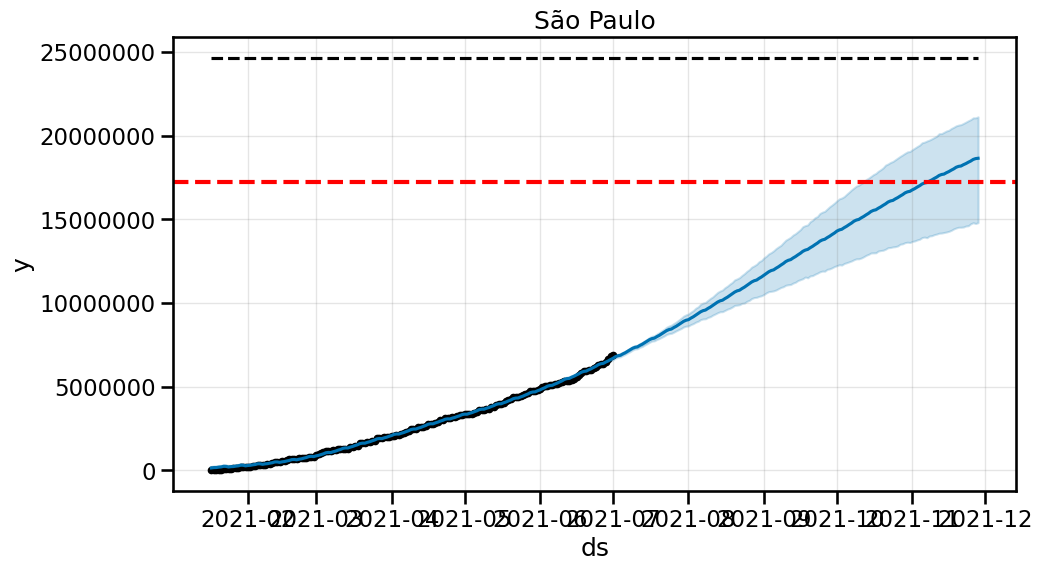

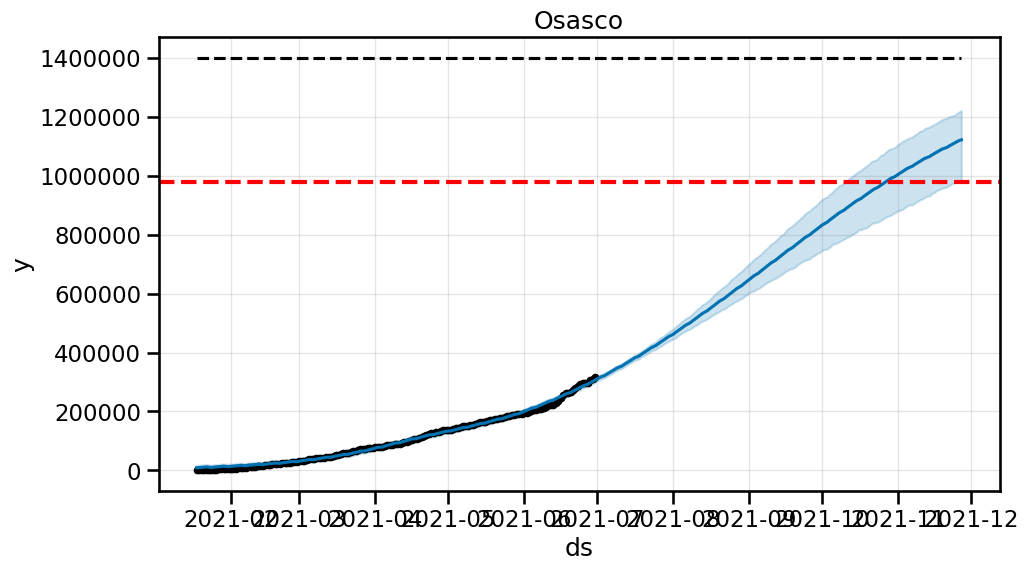

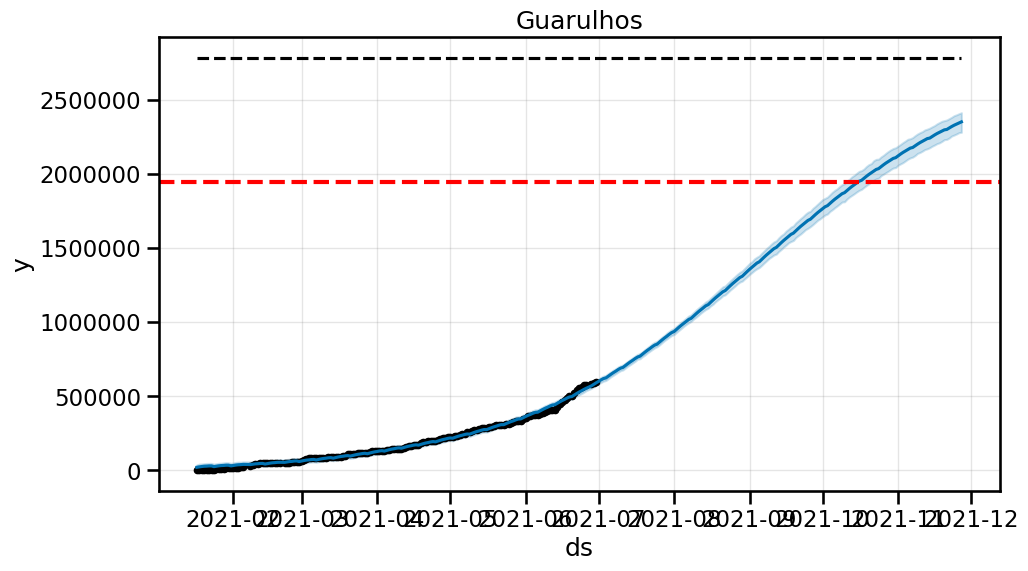

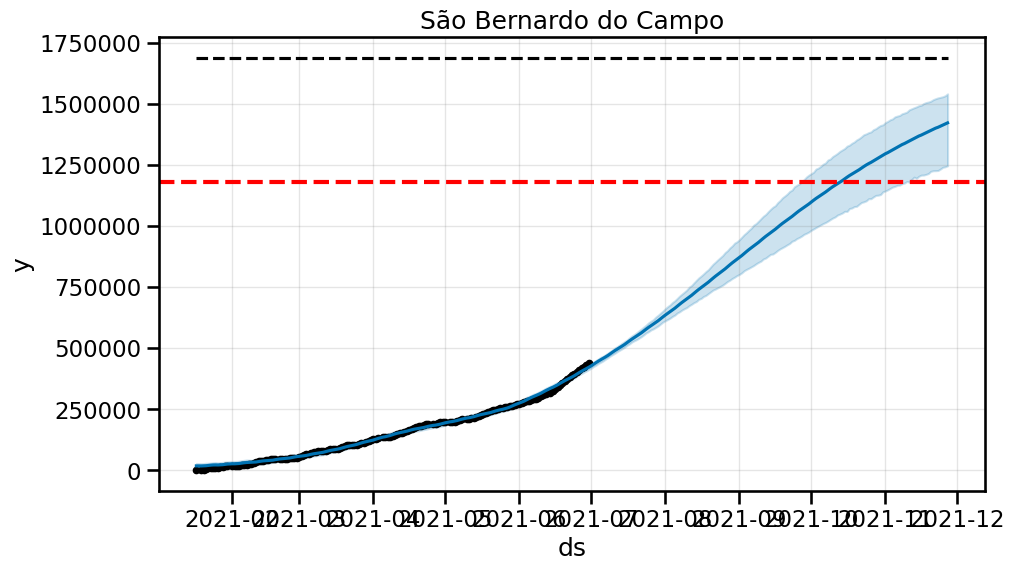

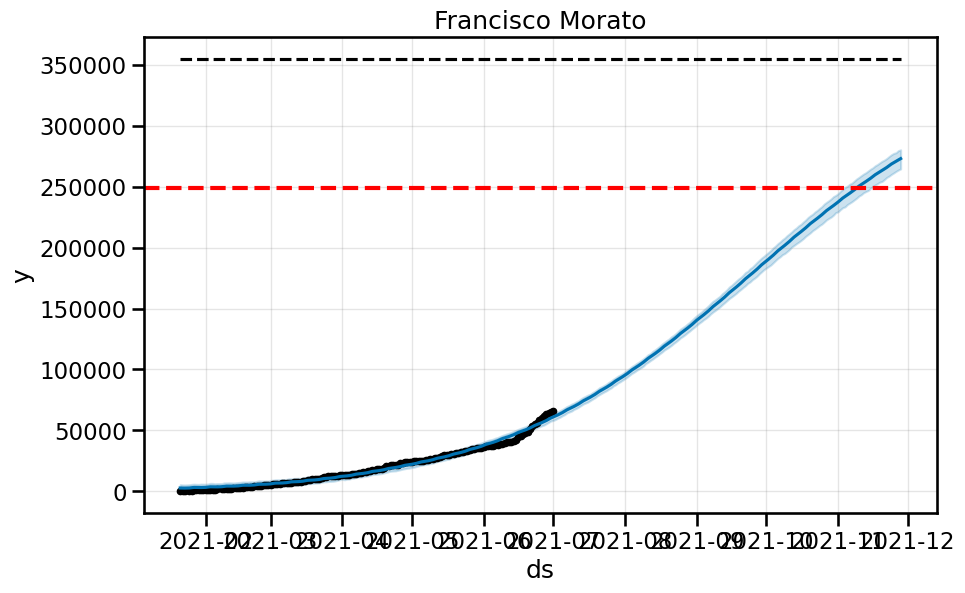

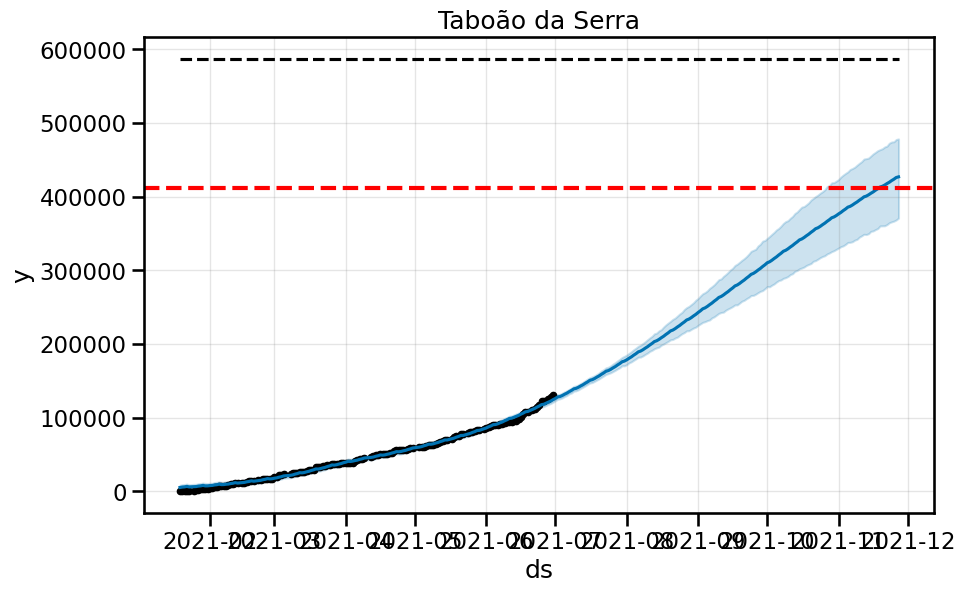

In [47]:
sns.set_context("talk")

fig = plt.figure(figsize = (20,10))

for k in range(0, 6):
  m2_tot[k][0].plot(m2_tot[k][1]);
  plt.title(cidades_modelos[k])
  plt.ticklabel_format(style = "plain", axis = "y")
  plt.axhline(y = (2*pop[k])*0.7, color = "red", lw = 3, ls = "--")

plt.show()

não vai demorar muito hein galera! até porque, sabemos que a taxa diaria vai aumentar, então podemos levar isso em conta

analise de cv com modelo logistico não é muito efetivo, valores muito pequenos:

In [48]:
df_cv = cross_validation(m2_sp[0], initial = "80 days", period = "14 days", horizon = "14 days")

In [49]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-04-09,2.455015e+06,2.399612e+06,2.514154e+06,2449872,2021-04-08
1,2021-04-10,2.489828e+06,2.431658e+06,2.553676e+06,2495721,2021-04-08
2,2021-04-11,2.506989e+06,2.449127e+06,2.566056e+06,2496752,2021-04-08
3,2021-04-12,2.574573e+06,2.514990e+06,2.630238e+06,2568370,2021-04-08
4,2021-04-13,2.627759e+06,2.568488e+06,2.690112e+06,2595210,2021-04-08
...,...,...,...,...,...,...
79,2021-06-27,6.301886e+06,6.202164e+06,6.395448e+06,6348821,2021-06-17
80,2021-06-28,6.376243e+06,6.275678e+06,6.478498e+06,6476583,2021-06-17
81,2021-06-29,6.437590e+06,6.333938e+06,6.548931e+06,6643102,2021-06-17
82,2021-06-30,6.513290e+06,6.399299e+06,6.630447e+06,6812811,2021-06-17


Valores pequenos, nem vale a pena olhar, olhar só pro erro: erro aumenta conforme o tempo passa, ter cuidado

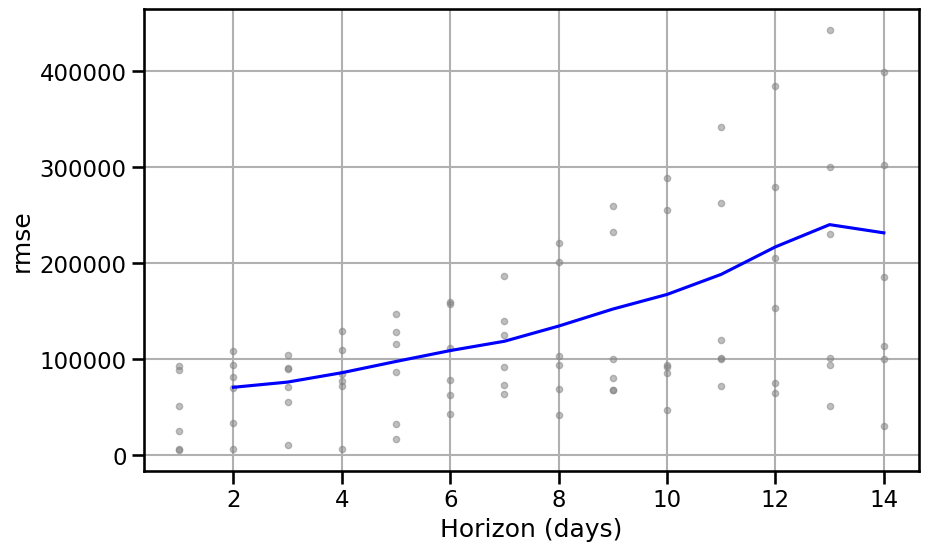

In [50]:
plot_cross_validation_metric(df_cv, metric = "rmse");